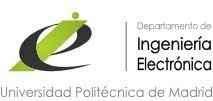

<div align="center">

# **Inteligencia en Sistemas Electrónicos (INSE)**
# Practice: Smart Health
## Physical Activity Recognition based on 3D accelerometer


---
---

</div>


In many contexts, having information about **the movements of a person could help to diagnose certain deseases**. One clear example can be Parkinson, a progressive disorder that affects the nervous system and movement. In some cases, it starts with soft tremblings that are not perceptible by the human-eye but easy to detect by an inertial sensor.
This example illustrates how attaching inertial sensors to different parts of the body could help to make an early diagnosis of certain illness and implement sollutions: "Smart" Spoon for Parkinson's Sufferers (https://www.youtube.com/watch?v=WiVQcgmIi08&ab_channel=BrianMKAllen).

The image below represents the overall diagram of a remote monitoring system for patients with diseases of musculoskeletal system, based on data collected from different types of motion sensors (accelerometers, magnetometers, gyroscopes...). Data collected by these sensors give information about the movements (and related activities) that the person performs. Once the raw signals are obtained, they can be pre-processed to remove noise, filter spourious signals and compute compact features for training a machine-learning model.

In this practice we will develope a simple **hand gesture recognizer based on 3D pattern assembled trajectories recorded by an accelerometer sensor**.



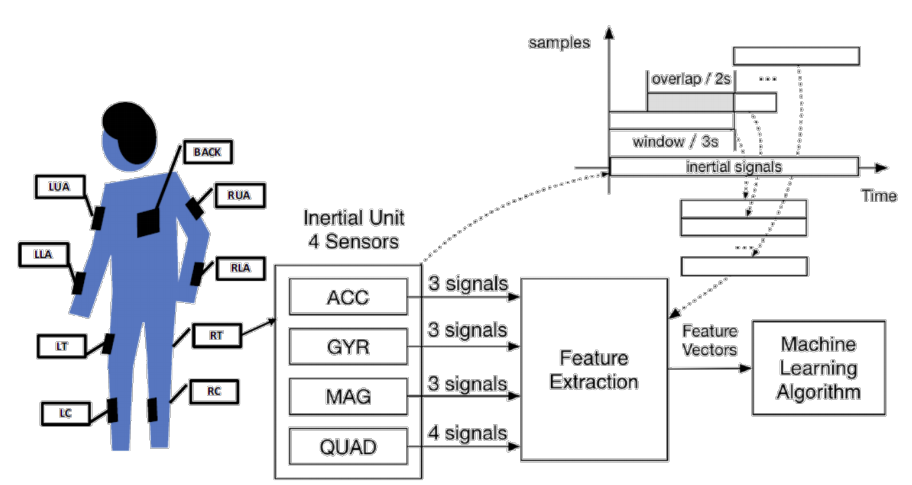


**Data Analysis**

As introduced before, in this session we will work with 3D data (X, Y, Z axis) obtained from accelerometers. Data was collected from participants while doing different movements.


These activities conform the classes between we should discern distributed uniformly in the dataset.

The corpus contains 10.560 instances with 200 attributes per axis (one sample lasts 4 seconds, being the sampling frequency of the acceleromenter 50 Hz). Overall, each instance has 600 attributes.

These 10.560 instances are distributed in 63.63% for the training set (6.720) and a 36.36% for test set (3.840).


As it is shown in the slices of the subject, Weka lets make a first simple visual analysis of the attributes that could give better results to distinguish between classes. Try to load the training arff and visualize the distributions of the classes and the relation between pairs of attributes.


**Summary**

This practice is dedicated to the familiarization with the tools introduced during the course, more specifically, to Weka and Tensorflow.

The main concepts that we will work are:

1. Firstly, we will study how the algorithms perform introducing raw data. As an example, we will use a Decission Tree available in Weka (J48) although other algorithms can be tested too.
2. Secondly, we will extract some features from the raw accelerometer signal, more concretely, MFCCs (Mel-frequency cepstral coefficients) and functionals (mean and standard deviation) from each axis, and we will train another J48 Tree. For more information about these features, visit: (https://medium.com/@jonathan_hui/speech-recognition-feature-extraction-mfcc-plp-5455f5a69dd9)
3. Thirdly, we will compare the results of the 2 previous approaches with those obtained with a a LSTM (Long Short-Term Memory), a type of recurrent neural network.


# Environment Set-up

In this section, we will download all the neccessary packages for running the experiments.

Among the packages and libraries installed, the most important are:

*   **oct2py**: This Python library lets run m-files from Python. Function in this practice: Extract MFCC features and their functionals.
*   **python-weka-wrapper**: This python library makes easy to run Weka algorithms from Python. It offers access to Weka API using thin wrappers around JNI calls employing the javabridge package. Function in this practice: Training-Evaluation-Testing algorithms.
* **pandas**: Python library that lets deal with csv and convert them to a DataFrame, type of data organization in a kind of table format.
* **tensorflow**: Open source software library for numerical computation using data-flow graphs and for implementing and training artificial neural networks.
* **numpy**: This Python library is oriented to make numeric operactions, algebra and mathematic analysis.
* **matplotlib**: This Python library contains graphic plot functions, similr to the resources available in Matlab for showing graphs.

As first action, run all the cells that you find below until the next section (READ IMPORTANT MESSAGE BELOW), in this way we will set-up the environment.


**IMPORTANT:** For the third cell, we should pay attention to the message that appears during the authentication process, since it asks for introducing a code into an empty field. This code is provided after clicking on the link that is located above the empty rectangle. Once the link is opened in a new window, we should copy the code into the empty rectangle and press Enter to continue with the process.

## Google drive connection

In [ ]:
# Connect to Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## General path configuration

In [ ]:
general_path = r'/content/drive/MyDrive/DOCENCIA/PIDS/HAR_INERCIAL_2023/'

## Octave libraries installation

In [ ]:
# Install oct2py and its libraries
!apt-get build-dep octave
!apt install octave
!pip install oct2py
!apt-get install unzip
!apt-get install -y octave-tsa
!apt-get install -y octave-linear-algebra
!apt-get install octave-signal

Reading package lists... Done
E: Unable to find a source package for octave
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  aglfn default-jre-headless epstool fonts-droid-fallback fonts-freefont-otf
  fonts-noto-mono fonts-urw-base35 ghostscript gnuplot-data gnuplot-qt gsfonts
  imagemagick-6-common info install-info libamd2 libauthen-sasl-perl libbtf1
  libcamd2 libccolamd2 libcholmod3 libclone-perl libcolamd2 libcombblas1.16.0
  libcxsparse3 libdata-dump-perl libemf1 libencode-locale-perl libevdev2
  libfftw3-double3 libfftw3-long3 libfftw3-mpi3 libfftw3-single3
  libfile-listing-perl libfltk-gl1.3 libfltk1.3 libfont-afm-perl libglpk40
  libglu1-mesa libgraphicsmagick++-q16-12 libgraphicsmagick-q16-3 libgs9
  libgs9-common libgudev-1.0-0 libhdf5-openmpi-103-1 libhtml-form-perl
  libhtml-format-perl libhtml-parser-perl libhtml-tagset-perl
  libhtml-tree-perl libhttp-cookies-perl lib

## Octave path configuration

In [ ]:
from oct2py import octave

# 'octave' folder with octave files must be placed in general_path directory
octave_path = general_path + '/octave/'
octave.addpath(octave_path)

    _pyeval at line 57 column 30



'.:/usr/local/lib/python3.10/dist-packages/oct2py:/usr/local/lib/python3.10/dist-packages/octave_kernel:/usr/lib/x86_64-linux-gnu/octave/6.4.0/site/oct/x86_64-pc-linux-gnu:/usr/lib/x86_64-linux-gnu/octave/site/oct/api-v56/x86_64-pc-linux-gnu:/usr/lib/x86_64-linux-gnu/octave/site/oct/x86_64-pc-linux-gnu:/usr/share/octave/6.4.0/site/m:/usr/share/octave/site/api-v56/m:/usr/share/octave/site/m:/usr/share/octave/site/m/startup:/usr/lib/x86_64-linux-gnu/octave/6.4.0/oct/x86_64-pc-linux-gnu:/usr/share/octave/6.4.0/m:/usr/share/octave/6.4.0/m/audio:/usr/share/octave/6.4.0/m/deprecated:/usr/share/octave/6.4.0/m/elfun:/usr/share/octave/6.4.0/m/general:/usr/share/octave/6.4.0/m/geometry:/usr/share/octave/6.4.0/m/gui:/usr/share/octave/6.4.0/m/help:/usr/share/octave/6.4.0/m/image:/usr/share/octave/6.4.0/m/io:/usr/share/octave/6.4.0/m/java:/usr/share/octave/6.4.0/m/legacy:/usr/share/octave/6.4.0/m/linear-algebra:/usr/share/octave/6.4.0/m/miscellaneous:/usr/share/octave/6.4.0/m/ode:/usr/share/octave/

## Weka libraries installation

In [ ]:
# Install other libraries and python-weka-wrapper3
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install cython
!pip install python-weka-wrapper3

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libproj-dev is already the newest version (8.2.1-1).
libproj-dev set to manually installed.
proj-data is already the newest version (8.2.1-1).
proj-data set to manually installed.
The following NEW packages will be installed:
  proj-bin
0 upgraded, 1 newly installed, 0 to remove and 16 not upgraded.
Need to get 154 kB of archives.
After this operation, 492 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 proj-bin amd64 8.2.1-1 [154 kB]
Fetched 154 kB in 0s (368 kB/s)
Selecting previously unselected package proj-bin.
(Reading database ... 131718 files and directories currently installed.)
Preparing to unpack .../proj-bin_8.2.1-1_amd64.deb ...
Unpacking proj-bin (8.2.1-1) ...
Setting up proj-bin (8.2.1-1) ...
Processing triggers for man-db (2.10.2-1) ...
Reading package lists... Done
Building dependency tree... Done
Reading state informatio

In [ ]:
# For more info, see: https://colab.research.google.com/github/kzafeiroudi/QuestRecommend/blob/master/TrainingOnQuora.ipynb#scrollTo=mrcWHtCRqFl-
# Install java and set environment variable
import os #importing os to set environment variable

def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null # install openjdk
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64" # set environment variable
  !java -version # check java version

install_java()

openjdk version "11.0.20.1" 2023-08-24
OpenJDK Runtime Environment (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04)
OpenJDK 64-Bit Server VM (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)


## Java VM start for WEKA

In [ ]:
import weka.core.jvm as jvm

# Create new instance of java virtual machine for running weka
jvm.start(max_heap_size="1200m")

DEBUG:weka.core.jvm:Adding bundled jars
DEBUG:weka.core.jvm:Classpath=['/usr/local/lib/python3.10/dist-packages/javabridge/jars/rhino-1.7R4.jar', '/usr/local/lib/python3.10/dist-packages/javabridge/jars/runnablequeue.jar', '/usr/local/lib/python3.10/dist-packages/javabridge/jars/cpython.jar', '/usr/local/lib/python3.10/dist-packages/weka/lib/core.jar', '/usr/local/lib/python3.10/dist-packages/weka/lib/weka.jar', '/usr/local/lib/python3.10/dist-packages/weka/lib/python-weka-wrapper.jar', '/usr/local/lib/python3.10/dist-packages/weka/lib/mtj.jar', '/usr/local/lib/python3.10/dist-packages/weka/lib/arpack_combined.jar']
DEBUG:weka.core.jvm:MaxHeapSize=1200m
DEBUG:weka.core.jvm:Package support disabled


## Relevant python libraries import

In [ ]:
# Import other libraries
from scipy.io import arff
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load and prepare the data


### Functions for data downloading (ARFF, CVS)

In [ ]:
def Download_arff(link):
  data=arff.loadarff(link)
  df_data=pd.DataFrame(data = data[0], columns={''})
  return df_data

# Load CSV data
def DownloadDS(filename, csv_with_user_info=False):
  df_csv = pd.read_csv(filename, sep=",", header=0)

  if csv_with_user_info:
    col_names = ['param' + str(i) for i in range(1,602)]
    col_names = col_names + ['class', 'user']
  else:
    col_names = ['param' + str(i) for i in range(1,601)]
    col_names = col_names + ['class']

  df_csv.columns = col_names
  return df_csv

# Load CSV data
# (two CSV: train and test)
def DownloadDS_train_test(path_train, path_test):
  df_train_csv = pd.read_csv(path_train, sep=",", header=0)
  df_test_csv = pd.read_csv(path_test, sep=",", header=0)

  col_names = ["param"+str(i) for i in range(1,601)]
  col_names = col_names + ["class", "user"]

  df_train_csv.columns = col_names
  df_test_csv.columns = col_names

  print('[INPUT DATA FROM][%s][SUCCESSFULLY LOADED!!!]' % path_train)
  print('[INPUT DATA FROM][%s][SUCCESSFULLY LOADED!!!]' % path_test)
  return df_train_csv, df_test_csv

### Input data specification
The student must provide the path to the project's working folder or the name of the previously downloaded CSV or ARFF file.

In [ ]:
path_data = general_path + r'/my_dataset/SHAKE_CIRCLES_TILT.csv'

You can OPTIONALLY choose to start with pre-established train and test lists.

In [ ]:
path_train= r'/content/drive/MyDrive/DOCENCIA/PIDS/HAR_INERCIAL_2023/data_ping_pong/HAR_Inercial-pingpong-TRAIN.csv'
path_test= r'/content/drive/MyDrive/DOCENCIA/PIDS/HAR_INERCIAL_2023/data_ping_pong/HAR_Inercial-pingpong-TEST.csv'

## General experiment setup

In [ ]:
# Desired percentage split for your data (you can change it)
percentage_test_split = 0.2

# Our .csv file does NOT include user id info
csv_with_user_info=False

df_csv = DownloadDS(path_data, csv_with_user_info)

# Obtain X and y
if csv_with_user_info:
  X = df_csv.drop(['class', 'user'], axis=1)
else:
  X = df_csv.drop(['class'], axis=1)

# Target variable 'class'
y = df_csv['class']

# Split data (you can change)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=percentage_test_split,
                                                    random_state=42)

# Next is part of the data preparation process for machine learning training,
# where a new dataset is gonna be created with an additional "user" column that has a constant value of 1.

# We take the two DataFrames, X_train and y_train, concatenate them side by side,
# and reset the index of the resulting DataFrame,
df_train_csv = pd.concat([X_train, y_train], axis=1).reset_index(drop=True)
# then add a new column called "user" with all values equal to 1 in that resulting DataFrame df_train_csv.
#df_train_csv = df_train_csv.assign(user=pd.Series(1, index=df_train_csv.index))

# Same for test
df_test_csv = pd.concat([X_test, y_test], axis=1).reset_index(drop=True)
#df_test_csv = df_test_csv.assign(user=pd.Series(1, index=df_test_csv.index))

print('df_test_csv\n', df_test_csv)

df_test_csv
        param1     param2     param3     param4     param5     param6  \
0    9.093438   9.435728   9.507538   9.205939   9.299291   9.658337   
1    8.279601   9.237056  10.115523  10.599037  11.630697   9.521899   
2    9.414186   9.457271   9.502750   9.399824   9.356738   9.122162   
3    5.672927   1.546291  -1.105862  -1.946029   0.339897   5.972131   
4    9.754083   9.916851  10.146639  10.211268  10.187331   9.974297   
5    1.510387   1.496025   1.498419   1.512781   1.493631   1.515174   
6    9.663124   9.663124   9.964723  10.117916  10.534409  10.448239   
7   12.482832  17.116919  19.994074  16.733937  15.321690  11.582823   
8   -1.335651   0.126863   4.418659  12.875389  18.840340  21.695953   
9   11.061011  11.061011   3.791526   2.178212   2.994444   4.035677   
10   5.574787   5.574787  23.294905  25.226572  21.559514  15.628075   
11   9.220301   9.935999   9.799562   9.787594   9.689454   9.794774   
12  10.802497  10.266321   8.571625   8.018694   8.

Run this cell ONLY if you have chosen to start with pre-established train and test lists.

In [ ]:
df_train_csv, df_test_csv = DownloadDS_train_test(path_train, path_test)

[INPUT DATA FROM][/content/drive/MyDrive/DOCENCIA/PIDS/HAR_INERCIAL_2023/data_ping_pong/HAR_Inercial-pingpong-TRAIN.csv][SUCCESSFULLY LOADED!!!]
[INPUT DATA FROM][/content/drive/MyDrive/DOCENCIA/PIDS/HAR_INERCIAL_2023/data_ping_pong/HAR_Inercial-pingpong-TEST.csv][SUCCESSFULLY LOADED!!!]


#Fuctions

Under this section, we can see the funcions that we will use in the 3 scenarios described briefly at the beginning.


## WEKA Functions


This group is related to the functions that we require for loading datasets, training and evaluating algorithms in Weka.

Run it now to have the functions ready for applying them later.

In [ ]:
import weka.core.jvm as jvm
from weka.core.converters import Loader, Saver
from weka.core.dataset import Instances
from weka.classifiers import Classifier, Evaluation
from weka.core.dataset import Instance
import weka.core.serialization as serialization

def InitNewDataset(dataset_file):
    """
    """
    print("\n[InitNewDataset]\n\t[input file = " + dataset_file + "]\n")
    aux_dataset = LoadDataset(dataset_file)
    sample_instance = aux_dataset.get_instance(0)
    new_dataset = aux_dataset
    new_dataset.delete()
    return [new_dataset, sample_instance]

def LoadDataset(dataset_file, debug = False):
    """
    Load a dataset in a Weka known format and return it. The input dataset must have the class as the last attribute.
      :param dataset_file: Path to the input dataset in ARFF format.
    """
    if debug:
       print("\n[LoadDataset]\ninput file = " + dataset_file + "\n")
    loader = Loader("weka.core.converters.ArffLoader")
    dataset = loader.load_file(dataset_file)
    dataset.class_is_last()

    return dataset

def LoadDatasetAsCSV(dataset_file, debug = False):
    """
    Load a dataset in a Weka known format and return it. The input dataset must have the class as the last attribute.
      :param dataset_file: Path to the input dataset in CSV format.
    """
    if debug:
       print("\n[LoadDataset]\ninput file = " + dataset_file + "\n")
    loader = Loader("weka.core.converters.CSVLoader")
    dataset = loader.load_file(dataset_file)
    dataset.class_is_last()
    return dataset


def CreateClassifier(classname="weka.classifiers.trees.J48", options=["-C", "0.25"]):
  """
    Create a new mode/classifier usig Weka.
      :param classname: This param receive the package in which the algorithm is, as it appears in Weka API. (https://weka.sourceforge.io/doc.stable/)
      :param options: List with the opcions that the algorithm accepts. This options vary with the algorithm, check Weka API for more information about
      the options that each algorithm has.
  """
  model = Classifier(classname=classname, options=options)
  return model

def LoadClassifier(classifier_file, debug=False):
    """
      Load a classifier from its saved archive ***.model .
      :param classifier_file: Path where we have the classifier saved: e.g. J48_trained_model.model
    """
    if debug:
        print("\n[LoadClassifier][" + classifier_file + "]\n")
    # read classifier object
    model = Classifier(jobject=serialization.read(classifier_file))
    print(model)
    return model

def TrainModel(train_dataset, classifier, output_path_model):
    """
      Train a built model.
      :param train_dataset: Dataset loaded in Weka format (see LoadDatasetAsCSV or LoadDataset).
      :param classifier: Classifier built or created (see CreateClassifier)
      :param output_path_model: Path where we want to save our model. e.g. "J48_trained_model.model"
    """
    #Indicate where is class label
    train_dataset.class_is_last()

    # train classifier
    classifier.build_classifier(train_dataset)

    # save classifier object
    print("\n[TrainedModel]\n\n")
    print(classifier)
    serialization.write(output_path_model, classifier)
    return classifier

def EvalClassifier(trained_classifier, train_dataset, test_dataset):
    """
      Eval a trained model.
      :param trained_classifier: Classifier built and trained(see TrainModel)
      :param train_dataset: Dataset loaded in Weka format with training data (see LoadDatasetAsCSV or LoadDataset).
      :param test_dataset: Dataset loaded in Weka format with data to test (see LoadDatasetAsCSV or LoadDataset).
    """
    evl_train = Evaluation(train_dataset)
    evl_test = Evaluation(train_dataset)
    print("--------RESULTS IN TRAINING----------")
    evl_train.test_model(trained_classifier, train_dataset)
    print(evl_train.summary())
    print("--------RESULTS IN TEST----------")
    evl_test.test_model(trained_classifier, test_dataset)
    print(evl_test.summary())
    eval_accuracy = evl_test.percent_correct
    return eval_accuracy

def Recognize(trained_classifier,test_dataset):
    """
      Make predictions of full dataset and print information of each sample results.
      :param trained_classifier: Classifier built and trained(see TrainModel)
      :param test_dataset: Dataset loaded in Weka format with data to test (see LoadDatasetAsCSV or LoadDataset).
    """
    print("# - actual - predicted - error - class distribution")
    for index, inst in enumerate(test_dataset):
      pred = trained_classifier.classify_instance(inst)
      dist = trained_classifier.distribution_for_instance(inst)
      print("%d - %s - %s - %s  - %s" %
                (index+1,
                inst.get_string_value(inst.class_index),
                inst.class_attribute.value(int(pred)),
                "yes" if pred != inst.get_value(inst.class_index) else "no",
                str(dist.tolist())))



## Feature Extraction Functions

The function section is constituted by one main function that obtains MFCC features and functionals from raw 3D accelerometer signals (FeatureExtraction), plus one for returning the new names of the features extracted for the default configuration.


Run it now to have the functions ready for applying them later.

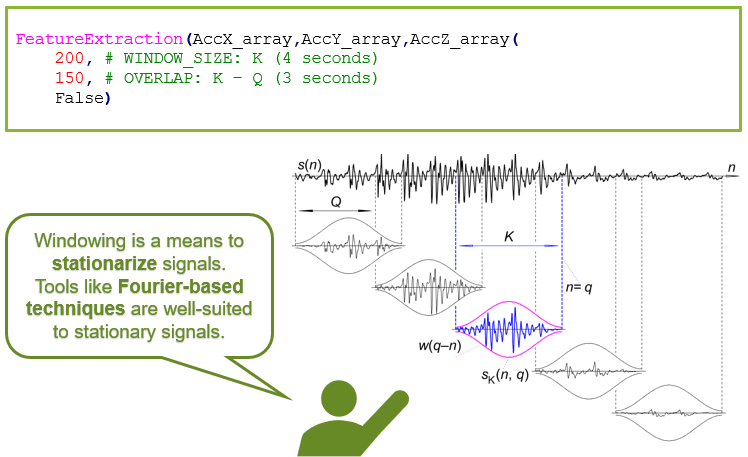


In [ ]:
import numpy as np
from oct2py import octave

def FeatureExtraction(AccX_array, AccY_array, AccZ_array, window_size=200, overlap=150, debug=False):
    """
    Extract MFCC (x10 x3axis) and functionals (mean & std) features from a sample of the 3D acceleromenter.

      :param AccX_array: Array with all the timesteps tht we have for the X component of the acceleromenter signal. (200 timesteps in our case)
      :param AccY_array: Array with all the timesteps tht we have for the Y component of the acceleromenter signal. (200 timesteps in our case)
      :param AccZ_array: Array with all the timesteps tht we have for the Z component of the acceleromenter signal. (200 timesteps in our case)
      :param window_size: Size of the window to apply to the raw signals (in number of samples). Default value in our case: 150 samples = 3 seconds (150 samples/50samplespsec)
      :param overlap: Overlap to apply between windows (in number of samples).  Default value in our case: 100 samples = 2 seconds (100 samples/50samplespsec)
    """
    aux_AccX_array = AccX_array[np.newaxis, :].T
    aux_AccY_array = AccY_array[np.newaxis, :].T
    aux_AccZ_array = AccZ_array[np.newaxis, :].T
    mfcc_plp = octave.calcula_features_mfcc_plp_online_new(aux_AccX_array, aux_AccY_array, aux_AccZ_array, window_size, overlap, False)

    functionals = [np.mean(aux_AccX_array), np.mean(aux_AccY_array), np.mean(aux_AccZ_array),
                   np.std(aux_AccX_array), np.std(aux_AccY_array), np.std(aux_AccZ_array)]

    if debug:
        print("\n[FeatureExtraction]\n")
        #print(aux_AccX_array)
        #print(aux_AccY_array)
        #print(aux_AccZ_array)
        print("\n[Result FeatureExtraction]\n")
        #print(result)
        print(functionals)
    res = np.append((np.asarray(mfcc_plp, dtype=float)),(np.asarray(functionals, dtype=float)))
    return res

def GetFeatureNames():
  """
    Return a list with the names of features extracted by FeatureExtraction
  """
  name_cols = []
  for i in range(1,37):
    if(i in range(1,11)):
      feature_name = "X_MFCC_param"+str(i)
    elif(i in range(11,21)):
      feature_name = "Y_MFCC_param"+str(i)
    elif(i in range(21,31)):
      feature_name = "Z_MFCC_param"+str(i)
    elif(i in [31]):
      feature_name = "X_mean_param"
    elif(i in [32]):
      feature_name = "Y_mean_param"
    elif(i in [33]):
      feature_name = "Z_mean_param"
    elif(i in [34]):
      feature_name = "X_std_param"
    elif(i in [35]):
      feature_name = "Y_std_param"
    elif(i in [36]):
      feature_name = "Z_std_param"
    name_cols.append(feature_name)
  return name_cols

##Class functions

we have a collection of common functions that convert data types and let plot images on different sections.

Run it now to have the functions ready for applying them later.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets

# LABEL FUNCTIONS

def get_class(num_classes):
  """
  name (string) the numeric classes of the data
  """
  classes_list = []
  for i in range(num_classes):
      new_class = input(f"Please, input the name of the class {i+1}: ")
      classes_list.append(new_class)
  return classes_list


def create_class_mapping(class_names):
  """
  create dictionary classes
  """
  class_mapping = {}
  for i, class_name in enumerate(class_names):
      class_mapping[i+1] = class_name
  return class_mapping

def Convert2nominal_activities(class_number, class_mapping):
  """
  mapping classes
  """
  if class_number in class_mapping:
      return class_mapping[class_number]
  else:
      return "UNK"


# def Convert2nominal_pingPong(class_number):
#   """
#     Transform numerical class to nominal classes
#     :param class_number: Number of class in numeric format
#     :return: Class as string (nominal type)
#   """
#   if(class_number == 1):
#     return "DRIVE"
#   elif(class_number == 2):
#     return "BACKHAND"
#   elif(class_number == 3):
#     return "SERVE"
#   elif(class_number == 4):
#     return "LOB"
#   else:
#     return "UNK"

def GetAccelerationAxis(df_csv):
  """
    Get arrays of X,Y and Z axis, as well as the class attribute and an array with all the parameters of the 3 axis.
    :param df_csv: Dataframe with the initial 600 parameters (or raw samples)
  """
  AccX_array = df_csv.loc[:, 'param1':'param200']
  AccY_array = df_csv.loc[:, 'param201':'param400']
  AccZ_array = df_csv.loc[:, 'param401':'param600']
  AccAll_array = df_csv.loc[:, 'param1':'param600']
  y = df_csv["class"]
  return AccX_array, AccY_array, AccZ_array, AccAll_array, y


# PLOT FUNCTIONS:

# SIMPLE PLOT PER SAMPLES
def plot_sample(sample2plot, df_csv, class_mapping):
  """
    Plot X,Y,Z raw samples of the acceleration.
    X axis is painted in red, Y xis in green and Z axis in blue.
    :param sample2plot: Number of the sample to plot
    :param df_csv: Dataframe with the initial 600 parameters (or raw samples)
  """
  # PLOT SIMPLE INSTANCE VALUES
  AccX_array_train = df_csv.loc[sample2plot, 'param1':'param200']
  AccY_array_train = df_csv.loc[sample2plot, 'param201':'param400']
  AccZ_array_train = df_csv.loc[sample2plot, 'param401':'param600']
  t = np.linspace(0, 4, 200)

  fig = plt.figure(figsize=(10, 10))
  plt.plot(t, AccX_array_train, color='r', label = "X") # plotting t, a separately
  plt.plot(t, AccY_array_train, color='g', label = "Y") # plotting t, b separately
  plt.plot(t, AccZ_array_train, color='b', label = "Z") # plotting t, c separately

  # FORMAT OF PLOT
  plt.legend(loc='lower right')
  plt.ylabel('Acceleration (m/s2)')
  plt.xlabel('Time (secs.)')
  title = 'Instance: ' + str(sample2plot)

  # Check if the 'column_name' column contains integers
  is_integer_column = df_csv['class'].apply(lambda x: isinstance(x, int)).all()

  if is_integer_column:
    #print("The 'column_name' column contains only integers")
    title = title + ' - Class: ' + Convert2nominal_activities(df_csv.loc[sample2plot, 'class'], class_mapping)
  else:
    #print("The 'column_name' column contains non-integer values")
    title = title + ' - Class: ' + df_csv.loc[sample2plot, 'class']

  plt.title(title)
  plt.show()

# PCA PLOTS
def PlotPCA(pca, Acc_array, y, title=""):
  """
    Plot a compacted vision of dataset in 3 axis using 3 main principal components of Principal Components Analysis (PCA).
    :param pca: pca analysis made with training set (check: CreatePCA)
    :param Acc_array: Array from wich we want to extract the new 3-PC
    :param y: Labels of the arrat passed in Acc_array
    :param title: Title of the plot (OPTIONAL)
  """
  #Prepare figure
  fig = plt.figure(1, figsize=(10, 10))
  plt.clf()
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
  plt.cla()

  #Extract 3 Principal Components
  principalComponents = pca.transform(Acc_array)
  principalDf = pd.DataFrame(data = principalComponents
              , columns = ['PC_1', 'PC_2', 'PC_3'])
  finalDf = pd.concat([principalDf, y], axis = 1)
  targets = [1, 2, 3, 4]
  targets_names = ["1 - DRIVE","2 - BACKHAND","3 - SERVE","4 - LOB"]
  colors = ['r', 'g', 'b', 'm']

  #Plot them
  for target, color in zip(targets,colors):
      indicesToKeep = finalDf['class'] == target
      ax.scatter(finalDf.loc[indicesToKeep, 'PC_1'],
                finalDf.loc[indicesToKeep, 'PC_2'],
                finalDf.loc[indicesToKeep, 'PC_3'],
                c = color,
                s = 50)

  ax.legend(targets_names)
  ax.grid()
  plt.title(title)
  plt.show()



def CreatePCA(train_df, test_df):
  """
    Plot a compacted vision of dataset in 3 axis using 3 main principal components of Principal Components Analysis (PCA).
    Create PCA using training dataframe and extract plots from each axis in train and test dataframes.
    :param train_df: Training Dataframe with the initial 600 parameters (or raw samples)
    :param test_df: Testing Dataframe with the initial 600 parameters (or raw samples)
  """
  #Get components of accelerometer:
  AccX_array_train, AccY_array_train, AccZ_array_train, AccAll_array_train, y_train = GetAccelerationAxis(train_df)
  AccX_array_test, AccY_array_test, AccZ_array_test, AccAll_array_test, y_test = GetAccelerationAxis(test_df)

  pca_X = decomposition.PCA(n_components=3)
  pca_X.fit(AccX_array_train)

  pca_Y = decomposition.PCA(n_components=3)
  pca_Y.fit(AccY_array_train)

  pca_Z = decomposition.PCA(n_components=3)
  pca_Z.fit(AccZ_array_train)

  pca_all = decomposition.PCA(n_components=3)
  pca_all.fit(AccAll_array_train)

  PlotPCA(pca_X, AccX_array_train, y_train, title="PCA axis X - TRAIN SET")
  PlotPCA(pca_X, AccX_array_test, y_test, title="PCA axis X - TEST SET")
  PlotPCA(pca_Y, AccY_array_train, y_train, title="PCA axis Y - TRAIN SET")
  PlotPCA(pca_Y, AccY_array_test, y_test, title="PCA axis Y - TEST SET")
  PlotPCA(pca_Z, AccZ_array_train, y_train, title="PCA axis Z - TRAIN SET")
  PlotPCA(pca_Z, AccZ_array_test, y_test, title="PCA axis Z - TEST SET")

  PlotPCA(pca_all, AccAll_array_train, y_train, title="PCA ALL axis - TRAIN SET")
  PlotPCA(pca_all, AccAll_array_test, y_test, title="PCA ALL axis - TEST SET")


# List of classes specification

In [ ]:
# Please, edit the following code to match your classes
# ALTERNATIVELY you may run the next cell to sequentially input them
num_classes = 3
num_classes = 4 # PING-PONG
classes_list = sorted(['CIRCLES', 'SHAKE', 'TILT'])
classes_list = ['DRIVE', 'BACKHAND', 'SERVE', 'LOB'] # PING-PONG
class_mapping = create_class_mapping(classes_list)
root_class_list = '_'.join(classes_list)
print(' ')
print('[CLASSES]')
print(class_mapping)
print('[root_class_list][%s]' % root_class_list)

 
[CLASSES]
{1: 'DRIVE', 2: 'BACKHAND', 3: 'SERVE', 4: 'LOB'}
[root_class_list][DRIVE_BACKHAND_SERVE_LOB]


## Rename Classes

The student can rename the 4 classes present in the data (for example: class 1, class 2...).

In [ ]:
num_classes = int(input('Please, input the NUMBER of classes: '))
classes_list = get_class(num_classes)
class_mapping = create_class_mapping(classes_list)
print(' ')
print('[CLASSES]')
print(' ')
print("Defined classes are:")
for c in classes_list:
    print('\t%s' % c)

Please, input the NUMBER of classes: 3
Please, input the name of the class 1: SHAKE
Please, input the name of the class 2: CIRCLES
Please, input the name of the class 3: TILT
 
[CLASSES]
 
Defined classes are:
	SHAKE
	CIRCLES
	TILT


In [ ]:
df_train_csv

,param1,param2,param3,param4,param5,param6,param7,param8,param9,param10,...,param593,param594,param595,param596,param597,param598,param599,param600,class,user
0,3.138062,3.164392,3.463597,2.508535,2.173425,1.816773,1.694697,1.795230,1.843103,2.125552,...,10.060469,11.805433,15.764513,22.572025,28.297612,23.385862,9.598496,0.426068,1,7
1,2.056137,2.051349,1.991508,1.957997,2.111190,2.163850,2.187787,2.194968,2.214117,2.238053,...,-5.653777,-5.232497,-4.480894,-3.561736,-2.989656,-1.977147,-1.977147,-1.448152,1,7
2,2.333799,2.498960,2.654547,2.812527,3.260138,3.726897,3.832217,3.312798,3.037529,2.898698,...,0.593623,0.509845,0.746816,1.146554,1.381130,2.015445,2.513322,3.341521,1,7
3,3.662269,3.188329,3.434873,3.264925,2.783803,3.662269,3.288861,3.150030,3.118913,3.104551,...,10.201693,10.484143,10.984413,11.558887,13.078848,13.816090,14.189498,14.136838,1,7
4,1.309321,1.278204,1.622888,1.957997,2.455875,3.398969,3.530619,2.477417,2.221298,1.893369,...,-7.056451,-6.347933,-5.603511,-5.280370,-4.727439,-4.162540,-3.229020,-2.723962,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6715,21.121478,22.145957,21.743826,19.627847,15.721427,13.708376,12.123786,9.813923,8.442368,7.228793,...,-4.839940,-3.530619,-2.913060,-2.211723,-1.704272,-1.649218,-2.419970,-3.133275,4,13
6716,-0.179523,0.093352,0.634315,0.955062,1.426609,1.661186,3.379820,4.495256,5.862024,8.298750,...,-5.445531,-7.573477,-8.540508,-8.992905,-7.769755,-6.984641,-6.379050,-4.112273,4,13
6717,13.813696,11.872454,10.689997,9.141311,8.358591,8.114440,7.824809,7.427465,7.209644,6.931981,...,7.152196,6.852991,6.771607,6.424529,5.701650,5.112815,4.669992,3.674237,4,13
6718,18.653637,18.653637,20.290886,20.637963,19.106034,17.408943,14.792695,13.174594,12.150117,10.567921,...,-3.398969,-3.585673,-3.734078,-4.073975,-4.576640,-4.782493,-4.875845,-5.347392,4,13


# Visualize some data

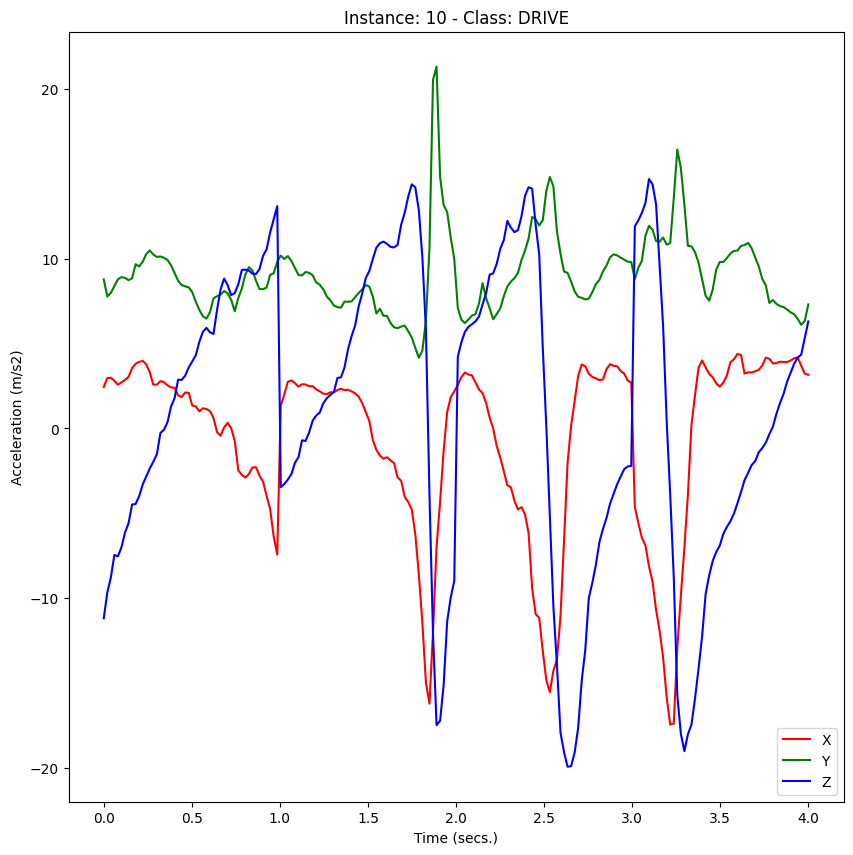

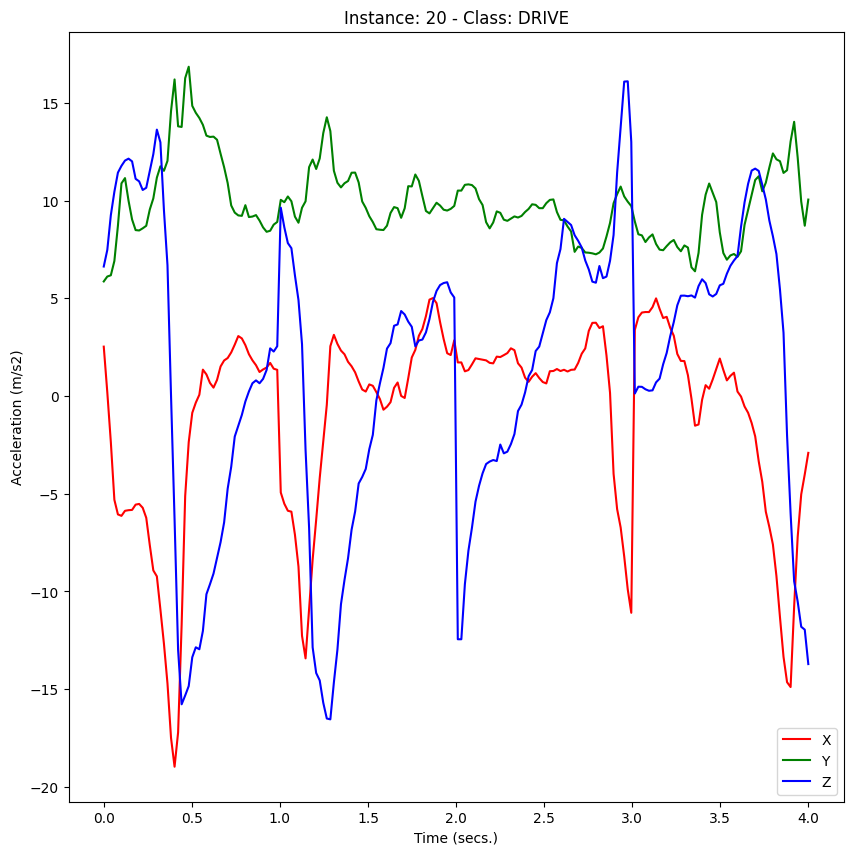

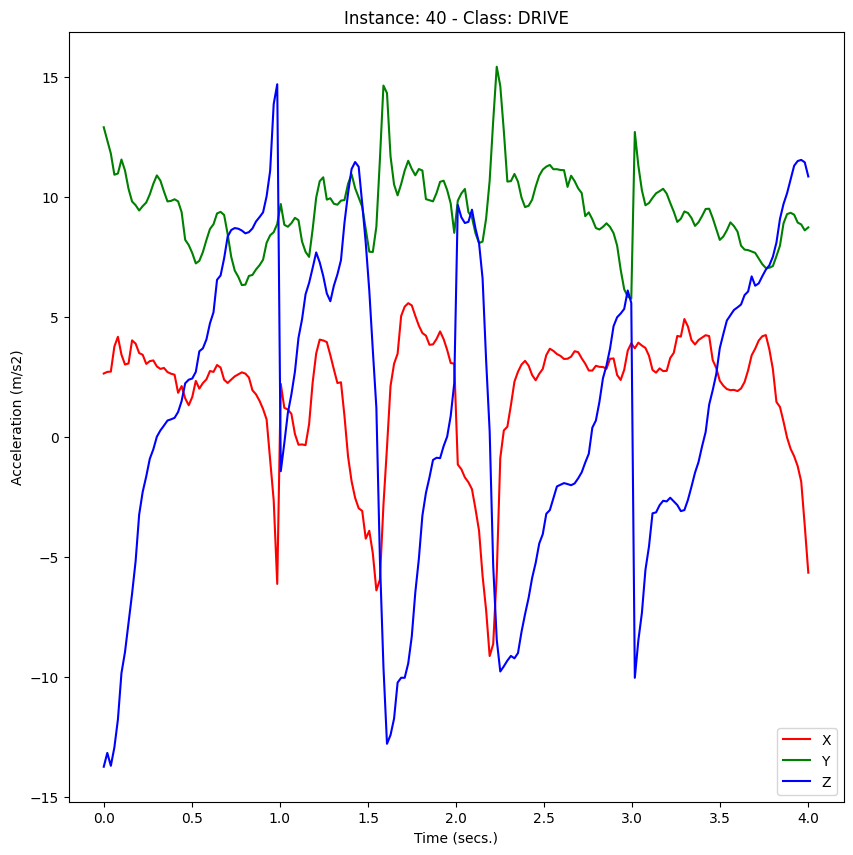

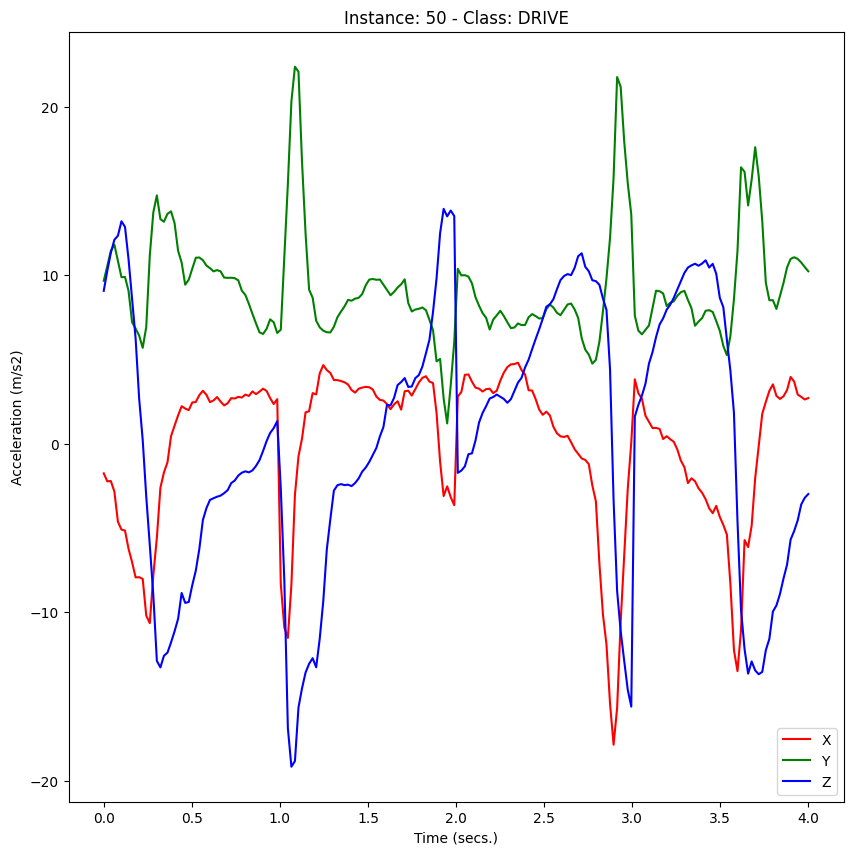

In [ ]:
# PLOT DATA:
# PLOT CSVs SINGLE SAMPLE
plot_sample(10, df_train_csv, class_mapping) # Class 1
plot_sample(20, df_train_csv, class_mapping) # Class 2
plot_sample(40, df_train_csv, class_mapping) # Class 3
plot_sample(50, df_train_csv, class_mapping) # Class 4

# Raw data + Decision Tree Scenario


This section englobes the experiments of the first scenario.

At the beginning, we will adapt the downloaded datasets to Weka expected format by transforming the labels from numerical type o nominal and appending them at the end of the attributes list.

After that, we will build and train a Decision Tree with the raw accelerometer data. We won’t process it in this part for having a reference performance before to include more complex proceedings.

At the end of this part, we will evaluate the model in terms of accuracy, and show the returned predictions of the trained model in our test set.


## 0) Data preparation

In [ ]:
def Save_CSV_from_Df(df_in, class_mapping, output_csv_filename):
  # We start by creating a copy of the input df
  df_out = df_in.copy()

  # Convert class data from numeric to nominal
  df_out['labels'] = df_out['class'].replace(class_mapping)

  # Remove numeric class and user column
  df_out = df_out.drop(['class'], axis=1)
  if 'user' in df_out.columns:
    df_out = df_out.drop(['user'], axis=1)

  # Before saving, we first sort the DataFrame based on the 'labels' column
  df_out = df_out.sort_values(by='labels')

  # We reset the index after sorting
  df_out = df_out.reset_index(drop=True)

  # Save dataframe
  df_out.to_csv(output_csv_filename, sep = ",", index=False, header=True, float_format=f'%.8f')

Save prepared .csv files

In [ ]:
# PREPARE DATA
Save_CSV_from_Df(df_train_csv, class_mapping, root_class_list + '_df_train_nominal.csv')
Save_CSV_from_Df(df_test_csv, class_mapping, root_class_list + '_df_test_nominal.csv')

## 1) Load raw data for WEKA

In [ ]:
# Load datasets as CSV
dataset_train_weka = LoadDatasetAsCSV(root_class_list + '_df_train_nominal.csv', debug = False)
dataset_test_weka = LoadDatasetAsCSV(root_class_list + '_df_test_nominal.csv', debug = False)

print('Sample size training: ', dataset_train_weka.num_instances)
print('Sample size testing: ', dataset_test_weka.num_instances)

Sample size training:  6720
Sample size testing:  3840


In [ ]:
print(dataset_train_weka[0:24])

@relation DRIVE_BACKHAND_SERVE_LOB_df_train_nominal

@attribute param1 numeric
@attribute param2 numeric
@attribute param3 numeric
@attribute param4 numeric
@attribute param5 numeric
@attribute param6 numeric
@attribute param7 numeric
@attribute param8 numeric
@attribute param9 numeric
@attribute param10 numeric
@attribute param11 numeric
@attribute param12 numeric
@attribute param13 numeric
@attribute param14 numeric
@attribute param15 numeric
@attribute param16 numeric
@attribute param17 numeric
@attribute param18 numeric
@attribute param19 numeric
@attribute param20 numeric
@attribute param21 numeric
@attribute param22 numeric
@attribute param23 numeric
@attribute param24 numeric
@attribute param25 numeric
@attribute param26 numeric
@attribute param27 numeric
@attribute param28 numeric
@attribute param29 numeric
@attribute param30 numeric
@attribute param31 numeric
@attribute param32 numeric
@attribute param33 numeric
@attribute param34 numeric
@attribute param35 numeric
@attribute 

## 2) WEKA model training

In [ ]:
# TRAIN NEW MODEL FROM RAW DATA

print('Classifying on: ', dataset_test_weka.class_attribute)

# Create model architecture:
options_J48 = ["-C", "0.25"]
model_arquitecture = CreateClassifier(classname="weka.classifiers.trees.J48", options=options_J48)

# Train model
!cd content; mkdir models
out_path_model = "models/trained_TreeRandomForest.model"
trained_model = TrainModel(dataset_train_weka, model_arquitecture, out_path_model)

Classifying on:  @attribute labels {BACKHAND,DRIVE,LOB,SERVE}
/bin/bash: line 1: cd: content: No such file or directory
mkdir: cannot create directory ‘models’: File exists

[TrainedModel]


J48 pruned tree
------------------

param227 <= 4.272647
|   param209 <= 8.045024
|   |   param491 <= -7.408316
|   |   |   param51 <= -15.893769
|   |   |   |   param431 <= -1.977147: SERVE (15.0/1.0)
|   |   |   |   param431 > -1.977147
|   |   |   |   |   param26 <= -5.440744: LOB (14.0)
|   |   |   |   |   param26 > -5.440744: DRIVE (6.0/1.0)
|   |   |   param51 > -15.893769
|   |   |   |   param101 <= 9.955149
|   |   |   |   |   param262 <= 7.008578
|   |   |   |   |   |   param443 <= 15.369562
|   |   |   |   |   |   |   param142 <= -20.125726
|   |   |   |   |   |   |   |   param8 <= -12.181234: DRIVE (3.0)
|   |   |   |   |   |   |   |   param8 > -12.181234
|   |   |   |   |   |   |   |   |   param351 <= 2.743111: LOB (3.0)
|   |   |   |   |   |   |   |   |   param351 > 2.743111: SERVE (12

## 3) WEKA model evaluation

In [ ]:
# EVALUATE MODEL
raw_system_test_acc = EvalClassifier(trained_model, dataset_train_weka, dataset_test_weka)

--------RESULTS IN TRAINING----------

Correctly Classified Instances        6570               97.7679 %
Incorrectly Classified Instances       150                2.2321 %
Kappa statistic                          0.9702
Mean absolute error                      0.0183
Root mean squared error                  0.0958
Relative absolute error                  4.8904 %
Root relative squared error             22.1142 %
Total Number of Instances             6720     

--------RESULTS IN TEST----------

Correctly Classified Instances        2039               53.099  %
Incorrectly Classified Instances      1801               46.901  %
Kappa statistic                          0.3747
Mean absolute error                      0.2365
Root mean squared error                  0.4748
Relative absolute error                 63.0639 %
Root relative squared error            109.6482 %
Total Number of Instances             3840     



In [ ]:
# SEE PREDICTIONS:
Recognize(trained_model, dataset_test_weka)

# - actual - predicted - error - class distribution
1 - BACKHAND - BACKHAND - no  - [1.0, 0.0, 0.0, 0.0]
2 - BACKHAND - BACKHAND - no  - [1.0, 0.0, 0.0, 0.0]
3 - BACKHAND - DRIVE - yes  - [0.0, 0.875, 0.125, 0.0]
4 - BACKHAND - DRIVE - yes  - [0.3333333333333333, 0.6666666666666666, 0.0, 0.0]
5 - BACKHAND - BACKHAND - no  - [1.0, 0.0, 0.0, 0.0]
6 - BACKHAND - DRIVE - yes  - [0.04, 0.96, 0.0, 0.0]
7 - BACKHAND - DRIVE - yes  - [0.0, 1.0, 0.0, 0.0]
8 - BACKHAND - BACKHAND - no  - [0.5, 0.0, 0.0, 0.5]
9 - BACKHAND - BACKHAND - no  - [1.0, 0.0, 0.0, 0.0]
10 - BACKHAND - BACKHAND - no  - [1.0, 0.0, 0.0, 0.0]
11 - BACKHAND - DRIVE - yes  - [0.04, 0.96, 0.0, 0.0]
12 - BACKHAND - DRIVE - yes  - [0.0, 1.0, 0.0, 0.0]
13 - BACKHAND - DRIVE - yes  - [0.0, 1.0, 0.0, 0.0]
14 - BACKHAND - DRIVE - yes  - [0.0, 0.875, 0.125, 0.0]
15 - BACKHAND - BACKHAND - no  - [1.0, 0.0, 0.0, 0.0]
16 - BACKHAND - DRIVE - yes  - [0.04, 0.96, 0.0, 0.0]
17 - BACKHAND - DRIVE - yes  - [0.04, 0.96, 0.0, 0.0]
18 - BACKHAND

#Feature Extraction + Decision Tree Scenario



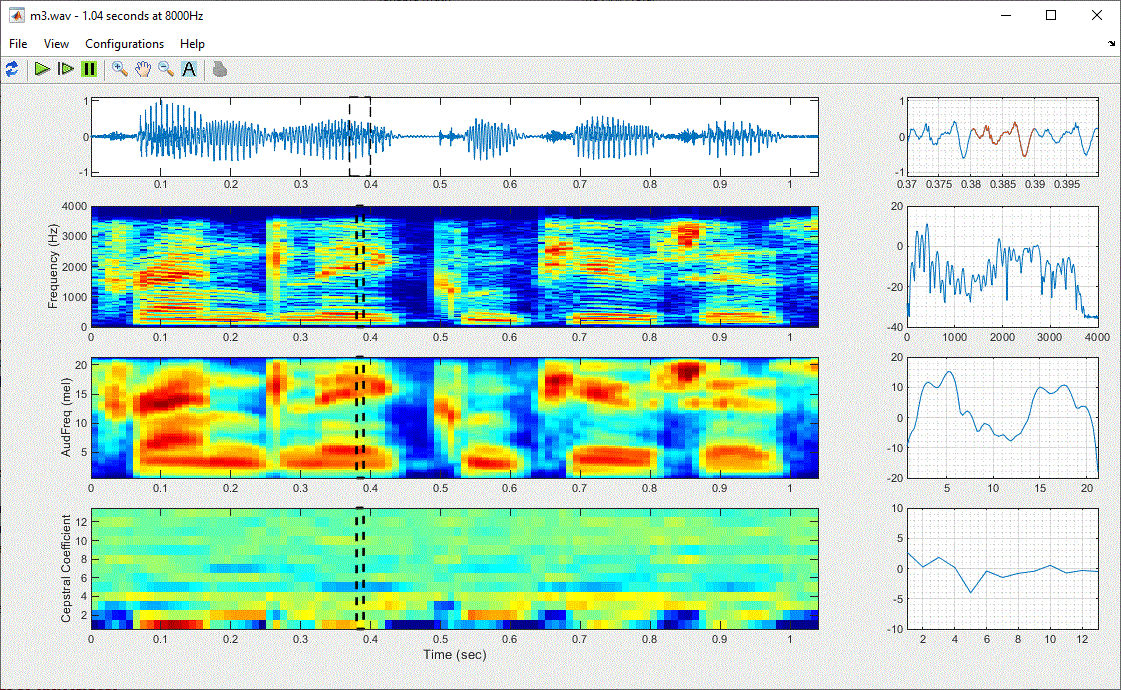

In this case, we will include a module whose function consists of extracting features from raw data. Among these features, we have Mel Frequency Cepstral Coeﬃcients (MFCC) that are usually employed in speech for representing information in a more compact way according to human auditive system. We will employ them in this new problem for simplicity(they are easy to extract), because MFCCs let work with much less information than raw signals and because they return uncorrelated features.

One of the main advantages of using features extracted from raw signals is that they compact information, reducing the number of input features and thus, the complexity of the models. Additionally, they are usually tailored to the problem, hence, we know that they will solve the problem with certain success.  However, discovering a good set of features is usually a time-consuming task that requires proposing new possible features, implementing them, and comparing them to find an optimal combination.

In summary, in this section we will extract features from accelerometer signals and repeat the previous section steps for training and evaluating the features-based J48-Decision-Tree.


**Note:** As the extraction process takes some time, it is recommended to download generated features datasets (mfcc_features_test.csv and mfcc_features_train.csv) and upload them later if you need to stop and close your current Collab session, since they won't be available in a new session.

## 0) Data preparation

In [ ]:
# GENERATE ARRAYS WITH EACH COMPONENT DATA
AccX_array_train = df_train_csv.loc[:, 'param1':'param200']
AccY_array_train = df_train_csv.loc[:, 'param201':'param400']
AccZ_array_train = df_train_csv.loc[:, 'param401':'param600']
labels_train = df_train_csv.loc[:,"class"]
#users_train = df_train_csv.loc[:,"user"]

AccX_array_test = df_test_csv.loc[:, 'param1':'param200']
AccY_array_test = df_test_csv.loc[:, 'param201':'param400']
AccZ_array_test = df_test_csv.loc[:, 'param401':'param600']
labels_test = df_test_csv.loc[:,"class"]
#users_test = df_test_csv.loc[:,"user"]

In [ ]:
labels_train_new = labels_train.replace(class_mapping)
labels_test_new = labels_test.replace(class_mapping)

In [ ]:
labels_test_new

0       DRIVE
1       DRIVE
2       DRIVE
3       DRIVE
4       DRIVE
        ...  
3835      LOB
3836      LOB
3837      LOB
3838      LOB
3839      LOB
Name: class, Length: 3840, dtype: object

In [ ]:
# Extract MFCC features from raw data:
# sampling freq of accelerometer: 50 samples/sec
window_size = 200 # 50 samples/sec * 3 secs
overlap = 150 # 50 samples/sec * 2 secs
name_cols = GetFeatureNames()

## 1) Feature estimation

In [ ]:
# GENERATE MFCC FEATURES OF TRAINING SET
mfcc_features_train = pd.DataFrame([], columns=name_cols)
for index in range(len(AccX_array_train)):
  if(index%100==0):
    print('[TRAIN] ', str(index) , 'samples out of', str(len(AccX_array_train)), 'processed...')
  features_train = FeatureExtraction(np.append(AccX_array_train.values[index],[0]),
                                     np.append(AccY_array_train.values[index],[0]),
                                     np.append(AccZ_array_train.values[index],[0]),
                                     window_size, overlap, False)
  mfcc_features_train = pd.concat([mfcc_features_train, pd.DataFrame([features_train], columns=name_cols)], ignore_index=True)

print('[TRAIN] ', str(index+1) , 'samples out of', str(len(AccX_array_train)), 'processed...')

# Append user id and class (as a nominal attribute)
#mfcc_features_train["user"] = users_train.values
mfcc_features_train["class"] = labels_train_new.values
mfcc_features_train.reset_index(drop=True, inplace=True)

[TRAIN]  0 samples out of 6720 processed...
    load_packages_and_dependencies at line 56 column 5
    load_packages at line 53 column 3
    pkg at line 588 column 7
    load_octave_packages at line 3 column 1
    calcula_features_mfcc_plp_online_new at line 8 column 1
    _pyeval at line 57 column 30

    load_packages_and_dependencies at line 56 column 5
    load_packages at line 53 column 3
    pkg at line 588 column 7
    load_octave_packages at line 3 column 1
    calcula_features_mfcc_plp_online_new at line 8 column 1
    _pyeval at line 57 column 30

    load_packages_and_dependencies at line 56 column 5
    load_packages at line 53 column 3
    pkg at line 588 column 7
    load_octave_packages at line 3 column 1
    calcula_features_mfcc_plp_online_new at line 8 column 1
    _pyeval at line 57 column 30

    load_packages_and_dependencies at line 56 column 5
    load_packages at line 53 column 3
    pkg at line 588 column 7
    load_octave_packages at line 3 column 1
    calcul

In [ ]:
mfcc_features_train

,X_MFCC_param1,X_MFCC_param2,X_MFCC_param3,X_MFCC_param4,X_MFCC_param5,X_MFCC_param6,X_MFCC_param7,X_MFCC_param8,X_MFCC_param9,X_MFCC_param10,...,Z_MFCC_param28,Z_MFCC_param29,Z_MFCC_param30,X_mean_param,Y_mean_param,Z_mean_param,X_std_param,Y_std_param,Z_std_param,class
0,62.859896,1.405189,-3.393092,-2.354016,-4.956016,-3.272820,-2.410291,-2.123528,-2.537872,-1.731091,...,-1.839991,-1.729364,-2.204169,-1.594057,9.570237,2.281556,8.114225,2.700874,8.639754,DRIVE
1,65.582490,-0.117031,-2.896317,-3.718451,-4.841757,-2.942085,-2.217496,-2.309201,-2.822049,-1.441404,...,-2.990154,-0.274845,-3.080250,-2.506391,9.994114,1.319265,8.447771,2.890366,9.626525,DRIVE
2,67.327938,-1.415114,-3.491664,-4.102201,-4.141615,-2.698640,-2.841925,-2.320493,-2.814619,-1.917012,...,-1.934640,-0.705163,-1.399605,-2.057816,9.949992,0.718592,8.008285,2.896780,9.272480,DRIVE
3,65.488358,-0.796019,-3.099896,-3.561795,-3.876465,-2.992359,-2.667471,-2.589346,-2.490899,-1.943229,...,-1.962462,-1.280822,-1.604806,-1.159570,9.981502,0.640638,6.589810,2.418098,8.367276,DRIVE
4,61.131709,0.048231,-2.493259,-2.561997,-2.883850,-3.136526,-2.423543,-2.313207,-1.977941,-0.665903,...,-1.737551,-1.002366,-1.128121,-1.413438,9.852198,-0.136199,5.981853,2.347683,8.888076,DRIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6715,59.470077,0.854008,-1.510465,-3.435447,-3.109789,-2.589343,-1.850795,-2.102296,-1.885897,-0.802101,...,-1.896335,-2.115435,-1.674415,8.555274,8.534208,-1.107648,6.028523,3.757182,5.439061,LOB
6716,60.261525,0.503503,-1.420898,-3.887519,-3.549358,-3.504140,-3.646711,-3.754349,-2.532354,-0.965437,...,-2.604749,-2.418794,-1.707676,8.431329,8.803248,-1.145625,5.496501,3.846287,4.901260,LOB
6717,59.759963,0.429448,-1.894736,-2.885389,-2.971477,-2.927441,-3.909316,-4.039711,-2.736614,-0.975816,...,-3.166728,-1.879783,-0.847181,8.305800,8.482691,-1.054321,5.494546,3.999568,5.183997,LOB
6718,60.037355,0.282131,-1.983946,-1.995506,-2.608298,-2.484855,-3.236912,-2.044196,-1.534956,-1.196450,...,-3.045766,-2.070105,-0.355563,8.409357,8.282828,-0.961743,6.121045,3.992571,5.313402,LOB


In [ ]:
# GENERATE MFCC FEATURES OF TEST SET
mfcc_features_test = pd.DataFrame([], columns=name_cols)
for index in range(len(AccX_array_test)):
  if(index%100==0):
    print('[TEST] ', str(index) , 'samples out of', str(len(AccX_array_test)), 'processed...')
  features_test = FeatureExtraction(np.append(AccX_array_test.values[index],[0]),
                                    np.append(AccY_array_test.values[index],[0]),
                                    np.append(AccZ_array_test.values[index],[0]),
                                    window_size, overlap, False)
  mfcc_features_test = pd.concat([mfcc_features_test, pd.DataFrame([features_test], columns=name_cols)], ignore_index=True)

print('[TEST] ', str(index+1) , 'samples out of', str(len(AccX_array_test)), 'processed...')

# Append user id and class(as a nominal attribute)
#mfcc_features_test["user"] = users_test.values
mfcc_features_test["class"] = labels_test_new.values
mfcc_features_test.reset_index(drop=True, inplace=True)

[TEST]  0 samples out of 3840 processed...
[TEST]  100 samples out of 3840 processed...
[TEST]  200 samples out of 3840 processed...
[TEST]  300 samples out of 3840 processed...
[TEST]  400 samples out of 3840 processed...
[TEST]  500 samples out of 3840 processed...
[TEST]  600 samples out of 3840 processed...
[TEST]  700 samples out of 3840 processed...
[TEST]  800 samples out of 3840 processed...
[TEST]  900 samples out of 3840 processed...
[TEST]  1000 samples out of 3840 processed...
[TEST]  1100 samples out of 3840 processed...
[TEST]  1200 samples out of 3840 processed...
[TEST]  1300 samples out of 3840 processed...
[TEST]  1400 samples out of 3840 processed...
[TEST]  1500 samples out of 3840 processed...
[TEST]  1600 samples out of 3840 processed...
[TEST]  1700 samples out of 3840 processed...
[TEST]  1800 samples out of 3840 processed...
[TEST]  1900 samples out of 3840 processed...
[TEST]  2000 samples out of 3840 processed...
[TEST]  2100 samples out of 3840 processed...


In [ ]:
mfcc_features_test

,X_MFCC_param1,X_MFCC_param2,X_MFCC_param3,X_MFCC_param4,X_MFCC_param5,X_MFCC_param6,X_MFCC_param7,X_MFCC_param8,X_MFCC_param9,X_MFCC_param10,...,Z_MFCC_param28,Z_MFCC_param29,Z_MFCC_param30,X_mean_param,Y_mean_param,Z_mean_param,X_std_param,Y_std_param,Z_std_param,class
0,56.946646,1.053860,-1.525319,-3.629169,-3.686354,-3.553229,-2.065611,-1.290664,-2.214573,-0.758829,...,-2.825671,-3.351280,-0.118331,6.530183,6.605232,0.281128,2.547460,3.235357,3.615688,DRIVE
1,57.891825,0.039236,-1.650579,-3.367783,-4.076407,-3.229387,-2.001697,-0.235547,-2.374797,-0.382007,...,-4.028068,-2.825413,-1.902597,5.029240,6.147320,-1.627318,5.179626,6.246506,5.141839,DRIVE
2,60.553759,0.427049,-3.202582,-1.144340,-2.317982,-1.727230,-1.246222,-1.398160,-3.503952,-1.594178,...,-1.401930,-2.765003,-2.304704,4.512571,6.312195,-2.160326,5.484539,7.079909,5.046312,DRIVE
3,62.529780,0.651260,-4.185356,-0.410050,-2.023899,-1.289677,-1.064507,-2.813109,-3.247423,-3.845121,...,-0.791456,-4.354232,-2.798513,4.041715,6.180235,-0.706100,5.381263,7.420221,5.997364,DRIVE
4,60.725267,0.575203,-3.368988,-1.604810,-2.482176,-2.887801,-0.634223,-1.247998,-1.205259,-2.758355,...,-0.232915,-2.786410,-0.880045,3.621018,6.340050,1.133430,5.462868,8.566430,7.375095,DRIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3835,58.031749,-0.111206,-2.536177,-1.546868,-4.591853,-5.363385,-2.272429,-4.319010,-5.415952,-2.157738,...,-4.409981,-4.165391,-2.796099,-2.944225,4.479620,5.468586,4.902009,3.952561,7.228956,LOB
3836,57.708813,0.259820,-1.559331,-1.416413,-4.620952,-4.854007,-1.815955,-3.852795,-3.881511,-1.659105,...,-2.596573,-4.410814,-2.790073,-2.912321,4.653772,5.895964,4.911084,4.103521,6.688349,LOB
3837,59.402440,-0.604051,-2.002792,-0.989204,-3.476159,-4.249571,-2.526931,-3.351151,-3.847541,-3.715748,...,-2.856338,-2.488386,-0.266026,-4.013408,5.587280,6.854813,4.727035,4.335168,6.216202,LOB
3838,61.445649,-1.245860,-2.664549,-1.182832,-3.169944,-3.205657,-2.091166,-1.582370,-1.558866,-2.771296,...,-2.392215,-1.739597,0.438689,-4.783052,6.402832,7.783522,4.197730,4.224010,5.126577,LOB


## 2) Feature visualization

[Feature Visualization][ini_sample = %d, end_sample = %d (interval = %d)] 100 200 100
0.CLASS:BACKHAND
1.CLASS:BACKHAND
2.CLASS:BACKHAND
3.CLASS:BACKHAND
4.CLASS:BACKHAND
5.CLASS:BACKHAND
6.CLASS:BACKHAND
7.CLASS:BACKHAND
8.CLASS:BACKHAND
9.CLASS:BACKHAND
10.CLASS:BACKHAND
11.CLASS:BACKHAND
12.CLASS:BACKHAND
13.CLASS:BACKHAND
14.CLASS:BACKHAND
15.CLASS:BACKHAND
16.CLASS:BACKHAND
17.CLASS:BACKHAND
18.CLASS:BACKHAND
19.CLASS:BACKHAND
20.CLASS:SERVE
21.CLASS:SERVE
22.CLASS:SERVE
23.CLASS:SERVE
24.CLASS:SERVE
25.CLASS:SERVE
26.CLASS:SERVE
27.CLASS:SERVE
28.CLASS:SERVE
29.CLASS:SERVE
30.CLASS:SERVE
31.CLASS:SERVE
32.CLASS:SERVE
33.CLASS:SERVE
34.CLASS:SERVE
35.CLASS:SERVE
36.CLASS:SERVE
37.CLASS:SERVE
38.CLASS:SERVE
39.CLASS:SERVE
40.CLASS:SERVE
41.CLASS:SERVE
42.CLASS:SERVE
43.CLASS:SERVE
44.CLASS:SERVE
45.CLASS:SERVE
46.CLASS:SERVE
47.CLASS:SERVE
48.CLASS:SERVE
49.CLASS:SERVE
50.CLASS:SERVE
51.CLASS:SERVE
52.CLASS:SERVE
53.CLASS:SERVE
54.CLASS:SERVE
55.CLASS:SERVE
56.CLASS:SERVE
57.CLASS:

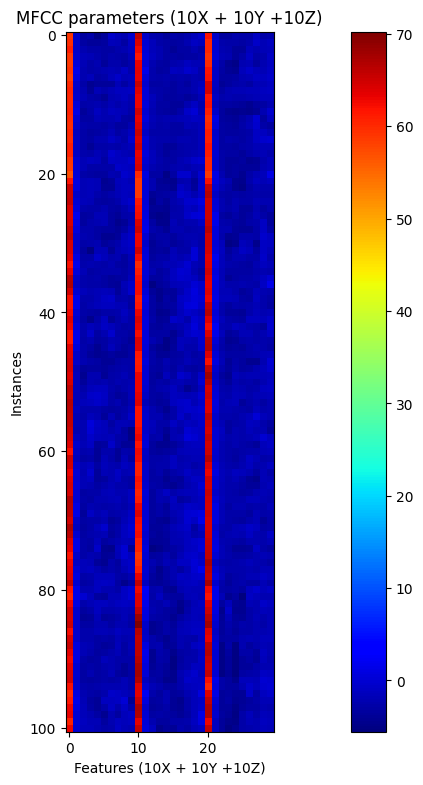

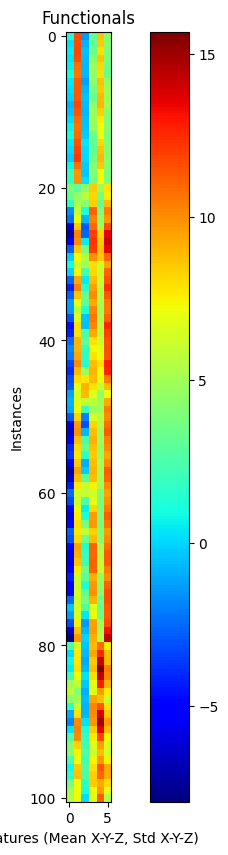

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# PLOT EXTRACTED MFCC SAMPLES
#df_csv = mfcc_features_train
df_csv = mfcc_features_test

# Visualization params
ini_sample = 100
end_sample = 200

samples_interval = end_sample - ini_sample

num_samples = len(df_csv)

if end_sample > num_samples:
  end_sample = num_samples

if end_sample - samples_interval < 0:
  ini_sample = 0

samples_interval = end_sample - ini_sample

print('[Feature Visualization][ini_sample = %d, end_sample = %d (interval = %d)]', ini_sample, end_sample, samples_interval)

# MFCC
MFCC_x = df_csv.loc[ini_sample:end_sample, 'X_MFCC_param1':'X_MFCC_param10'].values.astype(float)
MFCC_y = df_csv.loc[ini_sample:end_sample, 'Y_MFCC_param11':'Y_MFCC_param20'].values.astype(float)
MFCC_z = df_csv.loc[ini_sample:end_sample, 'Z_MFCC_param21':'Z_MFCC_param30'].values.astype(float)

# FUNCTIONALS:
functionals_x = df_csv.loc[ini_sample:end_sample, ['X_mean_param','X_std_param']].values.astype(float)
functionals_y = df_csv.loc[ini_sample:end_sample, ['Y_mean_param','Y_std_param']].values.astype(float)
functionals_z = df_csv.loc[ini_sample:end_sample, ['Z_mean_param','Z_std_param']].values.astype(float)
t = np.linspace(0, 4, 200)

figsize_new = (end_sample-ini_sample)
plt.figure(figsize=(max(10,(int(figsize_new/5))), max(10,(int(figsize_new/5)))))

plt.subplot(212)
plt.imshow((df_csv.loc[ini_sample:end_sample, 'X_MFCC_param1':'Z_MFCC_param30'].values.astype(float)), cmap=plt.cm.jet)
plt.title("MFCC parameters (10X + 10Y +10Z)")
plt.xlabel('Features (10X + 10Y +10Z)')
plt.ylabel('Instances')
plt.colorbar()

# PLOT FUNCTIONALS
plt.figure(figsize=(max(5,(int(figsize_new/10))), max(5,(int(figsize_new/10)))))
plt.imshow((df_csv.loc[ini_sample:end_sample, 'X_mean_param':'Z_std_param'].values.astype(float)),
           cmap=plt.cm.jet)
plt.title("Functionals")
plt.xlabel('Features (Mean X-Y-Z, Std X-Y-Z)')
plt.ylabel('Instances')
plt.colorbar()

#PRINT CLASS
n = 0
for i in df_csv.loc[ini_sample:end_sample, 'class'].values:
  print(str(n)+".CLASS:" + i)
  n+=1
plt.show()


## 3) Feature save

We can save the MFCC features in .csv files

In [ ]:
# We first sort the DataFrame based on the 'class' column
mfcc_features_train = mfcc_features_train.sort_values(by='class')
# We reset the index after sorting
mfcc_features_train = mfcc_features_train.reset_index(drop=True)
# Same for test
mfcc_features_test = mfcc_features_test.sort_values(by='class')
mfcc_features_test = mfcc_features_test.reset_index(drop=True)

In [ ]:
# We save the result
mfcc_features_train.to_csv('circles_shake_tilt-mfcc_features_train.csv', sep = ",", index=False, header=True)
mfcc_features_test.to_csv('circles_shake_tilt-mfcc_features_test.csv', sep = ",", index=False, header=True)

If using ping-pong data...

In [ ]:
# We save the result
mfcc_features_train.to_csv('ping_pong-mfcc_features_train.csv', sep = ",", index=False, header=True)
mfcc_features_test.to_csv('ping_pong-mfcc_features_test.csv', sep = ",", index=False, header=True)

We can also download a copy of the .csv files generated...

In [ ]:
# Download MFCC DATASETS ON LOCAL
from google.colab import files
files.download('circles_shake_tilt-mfcc_features_train.csv')
files.download('circles_shake_tilt-mfcc_features_test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

If using ping-pong data...

In [ ]:
# Download MFCC DATASETS ON LOCAL
from google.colab import files
files.download('ping_pong-mfcc_features_train.csv')
files.download('ping_pong-mfcc_features_test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 ... so that we can upload them later! (choose one of the next 2 cells to run it accordingly)

In [ ]:
mfcc_features_train = pd.read_csv('circles_shake_tilt-mfcc_features_train.csv', header=0)
mfcc_features_test = pd.read_csv('circles_shake_tilt-mfcc_features_test.csv',  header=0)

In [ ]:
mfcc_features_train = pd.read_csv('ping_pong-mfcc_features_train.csv', header=0)
mfcc_features_test = pd.read_csv('ping_pong-mfcc_features_test.csv',  header=0)

Just checking...

In [ ]:
mfcc_features_test

,X_MFCC_param1,X_MFCC_param2,X_MFCC_param3,X_MFCC_param4,X_MFCC_param5,X_MFCC_param6,X_MFCC_param7,X_MFCC_param8,X_MFCC_param9,X_MFCC_param10,...,Z_MFCC_param28,Z_MFCC_param29,Z_MFCC_param30,X_mean_param,Y_mean_param,Z_mean_param,X_std_param,Y_std_param,Z_std_param,class
0,58.457482,-0.752924,-3.186479,-3.189376,-2.870812,-2.801303,-3.238433,-4.845027,-3.802763,-1.437623,...,-0.778437,-1.919168,-3.307990,-0.400167,9.928175,-3.535728,2.870247,4.779767,4.176287,BACKHAND
1,58.847389,-0.654708,-2.367781,-1.819481,-4.363211,-4.229371,-3.133897,-3.007983,-2.159974,-2.402582,...,-2.746151,-3.793152,-3.023674,2.612735,10.582330,2.028497,3.210624,3.695108,6.510778,BACKHAND
2,58.460371,0.000019,-3.036121,-1.556288,-2.939338,-3.589869,-3.116522,-2.180627,-3.551907,-2.735170,...,-2.071408,-2.325054,-1.987898,2.685640,10.357828,2.185381,3.351164,3.558434,6.375913,BACKHAND
3,59.509745,-0.208589,-3.014945,-1.686443,-2.153783,-3.553959,-3.251885,-3.089271,-3.685811,-1.634459,...,-2.093457,-2.101593,-1.964615,2.390294,10.228250,3.147506,3.394247,3.679303,6.934456,BACKHAND
4,60.801621,-1.009124,-3.000013,-3.389295,-3.569237,-3.511932,-2.385553,-1.757278,-0.989074,-0.237051,...,-2.897089,-2.194000,-1.479883,2.190300,9.975977,3.786381,3.495613,3.681584,7.535331,BACKHAND
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3835,61.001575,0.895803,-1.881343,-1.700818,-2.809500,-3.594502,-3.496487,-1.073056,-1.590686,-0.257587,...,-1.334553,-2.086388,-1.096224,5.918507,1.000625,-1.806281,8.916958,6.196155,8.579643,SERVE
3836,65.385070,1.284720,-2.761920,-1.863380,-3.667844,-3.996802,-3.583190,-2.375705,-2.172473,-1.073660,...,-1.071336,-2.587253,-1.778379,2.518990,2.049682,-2.419041,12.514008,8.536891,12.253529,SERVE
3837,66.415343,0.954238,-2.161822,-3.010038,-4.310497,-3.154337,-2.712389,-3.649341,-0.738888,-1.645824,...,-2.039707,-3.111361,-1.528029,1.320122,1.730614,-1.634546,14.284274,9.877633,14.977055,SERVE
3838,58.554097,0.327415,-1.335214,-1.969210,-2.496248,-3.100675,-2.411859,-3.395702,-2.522229,-2.279665,...,-2.460101,-2.702462,-3.027132,7.228269,0.963494,-2.596301,4.055520,3.348629,6.393191,SERVE


## 4) Load features for WEKA

In [ ]:
# Load datasets
dataset_train_mfcc = LoadDatasetAsCSV('circles_shake_tilt-mfcc_features_train.csv', debug = False)
dataset_test_mfcc = LoadDatasetAsCSV('circles_shake_tilt-mfcc_features_test.csv', debug = False)

Sample size training:  6720
Sample size testing:  3840


In [ ]:
# Load datasets
dataset_train_mfcc = LoadDatasetAsCSV('ping_pong-mfcc_features_train.csv', debug = False)
dataset_test_mfcc = LoadDatasetAsCSV('ping_pong-mfcc_features_test.csv', debug = False)

In [ ]:
print('Sample size training: ', dataset_train_mfcc.num_instances)
print('Sample size testing: ', dataset_test_mfcc.num_instances)

Sample size training:  6720
Sample size testing:  3840


In [ ]:
print(dataset_train_mfcc[0:24])

@relation ping_pong-mfcc_features_train

@attribute X_MFCC_param1 numeric
@attribute X_MFCC_param2 numeric
@attribute X_MFCC_param3 numeric
@attribute X_MFCC_param4 numeric
@attribute X_MFCC_param5 numeric
@attribute X_MFCC_param6 numeric
@attribute X_MFCC_param7 numeric
@attribute X_MFCC_param8 numeric
@attribute X_MFCC_param9 numeric
@attribute X_MFCC_param10 numeric
@attribute Y_MFCC_param11 numeric
@attribute Y_MFCC_param12 numeric
@attribute Y_MFCC_param13 numeric
@attribute Y_MFCC_param14 numeric
@attribute Y_MFCC_param15 numeric
@attribute Y_MFCC_param16 numeric
@attribute Y_MFCC_param17 numeric
@attribute Y_MFCC_param18 numeric
@attribute Y_MFCC_param19 numeric
@attribute Y_MFCC_param20 numeric
@attribute Z_MFCC_param21 numeric
@attribute Z_MFCC_param22 numeric
@attribute Z_MFCC_param23 numeric
@attribute Z_MFCC_param24 numeric
@attribute Z_MFCC_param25 numeric
@attribute Z_MFCC_param26 numeric
@attribute Z_MFCC_param27 numeric
@attribute Z_MFCC_param28 numeric
@attribute Z_MFC

## 5) WEKA model training

In [ ]:
# TRAIN NEW MODEL WITH MFCC FEATURES
print('Classifying on: ', dataset_train_mfcc.class_attribute)
#Create model architecture:
options_J48 = ["-C", "0.25"]
model_arquitecture_mfcc = CreateClassifier(classname="weka.classifiers.trees.J48", options=options_J48)

#Train model
!cd ../content; mkdir models
out_path_model_mfcc = "models/trained_TreeRandomForest_mfcc.model"
trained_model = TrainModel(dataset_train_mfcc, model_arquitecture_mfcc, out_path_model_mfcc)

Classifying on:  @attribute class {BACKHAND,DRIVE,LOB,SERVE}
mkdir: cannot create directory ‘models’: File exists

[TrainedModel]


J48 pruned tree
------------------

Y_mean_param <= 7.124592
|   Z_std_param <= 8.916517
|   |   X_std_param <= 10.275998
|   |   |   Z_mean_param <= 6.025304
|   |   |   |   Z_std_param <= 6.864525
|   |   |   |   |   X_mean_param <= -6.755912
|   |   |   |   |   |   Z_mean_param <= -1.191402
|   |   |   |   |   |   |   X_std_param <= 9.602791: DRIVE (65.0)
|   |   |   |   |   |   |   X_std_param > 9.602791: LOB (4.0)
|   |   |   |   |   |   Z_mean_param > -1.191402
|   |   |   |   |   |   |   X_std_param <= 5.270528
|   |   |   |   |   |   |   |   Y_std_param <= 3.669155
|   |   |   |   |   |   |   |   |   Y_mean_param <= 4.673707: BACKHAND (3.0/1.0)
|   |   |   |   |   |   |   |   |   Y_mean_param > 4.673707: DRIVE (41.0)
|   |   |   |   |   |   |   |   Y_std_param > 3.669155
|   |   |   |   |   |   |   |   |   X_MFCC_param9 <= -1.566222: BACKHAND (3.0/

## 6) WEKA model evaluation

In [ ]:
# EVAL TRAINED MODEL WITH MFCC FEATURES
feature_system_test_acc = EvalClassifier(trained_model, dataset_train_mfcc, dataset_test_mfcc)

--------RESULTS IN TRAINING----------

Correctly Classified Instances        6602               98.244  %
Incorrectly Classified Instances       118                1.756  %
Kappa statistic                          0.9766
Mean absolute error                      0.015 
Root mean squared error                  0.0866
Relative absolute error                  3.9996 %
Root relative squared error             19.9989 %
Total Number of Instances             6720     

--------RESULTS IN TEST----------

Correctly Classified Instances        1922               50.0521 %
Incorrectly Classified Instances      1918               49.9479 %
Kappa statistic                          0.334 
Mean absolute error                      0.2505
Root mean squared error                  0.4898
Relative absolute error                 66.7916 %
Root relative squared error            113.1135 %
Total Number of Instances             3840     



In [ ]:
# RECOGNITION
Recognize(trained_model, dataset_test_mfcc)

# - actual - predicted - error - class distribution
1 - BACKHAND - BACKHAND - no  - [0.9769230769230769, 0.023076923076923078, 0.0, 0.0]
2 - BACKHAND - BACKHAND - no  - [1.0, 0.0, 0.0, 0.0]
3 - BACKHAND - BACKHAND - no  - [1.0, 0.0, 0.0, 0.0]
4 - BACKHAND - DRIVE - yes  - [0.0, 1.0, 0.0, 0.0]
5 - BACKHAND - LOB - yes  - [0.0, 0.0, 1.0, 0.0]
6 - BACKHAND - DRIVE - yes  - [0.05, 0.95, 0.0, 0.0]
7 - BACKHAND - LOB - yes  - [0.0, 0.0, 1.0, 0.0]
8 - BACKHAND - BACKHAND - no  - [1.0, 0.0, 0.0, 0.0]
9 - BACKHAND - BACKHAND - no  - [1.0, 0.0, 0.0, 0.0]
10 - BACKHAND - BACKHAND - no  - [1.0, 0.0, 0.0, 0.0]
11 - BACKHAND - BACKHAND - no  - [1.0, 0.0, 0.0, 0.0]
12 - BACKHAND - DRIVE - yes  - [0.0, 1.0, 0.0, 0.0]
13 - BACKHAND - BACKHAND - no  - [1.0, 0.0, 0.0, 0.0]
14 - BACKHAND - BACKHAND - no  - [1.0, 0.0, 0.0, 0.0]
15 - BACKHAND - LOB - yes  - [0.0, 0.0, 1.0, 0.0]
16 - BACKHAND - DRIVE - yes  - [0.0, 1.0, 0.0, 0.0]
17 - BACKHAND - DRIVE - yes  - [0.0, 1.0, 0.0, 0.0]
18 - BACKHAND - DRIVE - yes

# Raw data + Temporal Model (LSTM)


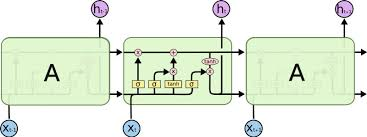

As we have seen in previous scenarios, results are quite good although there are still a possibility to improve them.

In this third scenario, we will implement an LSTM model. LSTM are temporal model invented to deal with temporal data, for this reason they are a good choice for our task.

The main advantages of these models are: they can work directly with raw data without any pre-selection of features, and they also can implement internally more complex functions than other algorithms.

In general, as deeper the network is, more complex function approximates although there is a saturation point, in which the model could start to show over-fitting if it is too complex for the data provided.

As we know, each instance consists of a serie of samples obtained during 4 seconds at a sampling frequency of 50 Hz, which gives 200 samples per component (X, Y, Z axis of accelerometer), thus our time-steps are 200.

First of all, we should prepare the data for having the expected size that the LSTM needs to receive, we do this by calling to the function: PrepareData(...) that will return an array with the shape: (x,200,3).

After having the datasets ready in array formats, we build a simple LSTM model with a single layer of 200 neurons, train it and evaluate it on test set.

Let's see the performance of the model and its results.

**Note**: To accelerate the LSTM training, it is highly recommended to use a Collab environment with GPU: Edit > Notebook settings or Runtime> Hardware accelerator select GPU.

If the environment is working with a GPU, after running next code cell it should print something like this:

TEST GPU is working: /device:GPU:0

If the result is just:


TEST GPU is working:

It means that you are not running on a GPU.


## LSTM Functions

The fourth group is composed by the neccesary functions for preparing dataset, an LSTM model (architecutre definition, training, evaluation...)
Do you feel curiosity about how LSTM works?? Check this!: http://colah.github.io/posts/2015-08-Understanding-LSTMs/   || https://www.youtube.com/watch?v=QciIcRxJvsM&ab_channel=CodeEmporium

Run it now to have the functions ready for applying them later.

In [ ]:
import tensorflow as tf
#sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
print("TEST GPU is working: ", tf.test.gpu_device_name())

TEST GPU is working:  /device:GPU:0


In [ ]:
import pandas as pd
import numpy as np

#from tensorflow.python.keras.models import Sequential
from tensorflow.keras import Sequential
#from tensorflow.python.keras.layers import LSTM, Dense
from tensorflow.keras.layers import LSTM, Dense

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

def PrepareData(df_csv, num_steps = 200, dimensions=3):
  """
    Prepare dataset for introducing data into LSTM. One important characteristic of LSTM is that they are temporal models, so data must follow a specific shape:
    (num_samples, num_steps, num_attributes), in our case for the training set will be: (4.800, 200, 3). We use 200 timesteps (4 secs.) because each sample has this temporal resoulution, number 3 makes reference to
    the number of attributes, in our case 3 becasue we introduce information about the 3-axis of the accelerometer signal.
    This function results the dataset as X and the labels in the array y.
    :param df_csv: Dataframe with the set to convert
    :param num_steps: Number of timesteps
    :param dimensions: Number of attributes
  """
  if 'user' in df_csv.columns:
    print('[PrepareData][Dropping \'user\' column...]')
    print('[PrepareData][OLD df shape]', df_csv.shape)
    df_csv = df_csv.drop(columns='user')
    print('[PrepareData][NEW df shape]', df_csv.shape)

  # We select all rows (:) and all columns up to the last column (:-1).
  # This means it includes all columns except for the last one (i.e. the class).
  X_pre = df_csv.iloc[:, :-1].values

  #print(df_csv.shape)
  #  y_pre will be a Pandas Series containing the data from the last column of the DataFrame df_csv.
  # The specific data in y_pre will depend on the content of that column in the DataFrame.
  y_pre = df_csv.iloc[:, -1]
  print('y_pre')
  print(y_pre.shape)
  print(y_pre)
  y_pre_dum = pd.get_dummies(y_pre).values
  print('y_pre_dum')
  print(y_pre_dum)
  X = []
  y = []

  num_samples = X_pre.shape[0]
  print('num_samples = %d (matches the number of rows)' % num_samples)
  print('num_steps = %d (matches the number of columns)' % num_steps)
  #print(X_pre)
  #print(X_pre.shape)
  for j in range(num_samples):   # row
      #print('iter j=%d' % j)
      for i in range(num_steps):    # column
          #print('iter i=%d' % i)
          X.append([X_pre[j, i], X_pre[j, i+num_steps], X_pre[j, i+(2*num_steps)]])

  data = np.array(X)
  X = data
  y = y_pre_dum
  X = X.reshape(-1, num_steps, dimensions)
  return X, y

def CreateLSTM(neurons_first_layer = 200, n_steps = 200, dimension = 3, loss='categorical_crossentropy',
               optimizer='rmsprop', metrics=['accuracy']):
  """
    Create LSTM model
    :param neurons_first_layer: Number of neurons of the first layer. This number can be different from the number of timesteps.
    :param n_steps: Number of timesteps of the input.
    :param dimensions: Number of attributes of the input
    :param loss: Loss function that the network will use during training for reducing its error
    :param optimez: Optimizer to use for the update rule and the training process
    :param metrics: List with the metrics to print during training
  """
  model_lstm = Sequential()
  model_lstm.add(LSTM(neurons_first_layer, input_shape=(n_steps, dimension), return_sequences=False, activation="tanh"))
  model_lstm.add(Dense(3, activation='softmax'))
  model_lstm.compile(loss=loss, optimizer=optimizer, metrics=metrics)
  return model_lstm

def EvalLSTM(y_labels, y_pred, num_classes):
  """
     Eval LSTM model. Print accuracy and confussion matrix.
    :param y_labels: Original labels of the set.
    :param y_pred: Predictions of the labels for the set.
  """
  #y_test_df = pd.DataFrame({0:y_labels[:,0],
  #                          1:y_labels[:,1],
  #                          2:y_labels[:,2],
  #                          3:y_labels[:,3]})

  # Create the DataFrame using a dictionary comprehension
  y_test_df = pd.DataFrame({i: [row[i] for row in y_labels] for i in range(num_classes)})

  y_test_df_idx=y_test_df.idxmax(axis=1)

  print(confusion_matrix(y_test_df_idx, y_pred))
  print(classification_report(y_test_df_idx, y_pred))
  eval_accuracy = 100 * accuracy_score(y_test_df_idx, y_pred)
  print('Accuracy %0.4f' % eval_accuracy)

  return eval_accuracy

def CalculateCI(num_samples, accuracy):
  """
    Calculate confidence interval for a confidence of 95%
    :param num_samples: Number of samples for the set to evaluate
    :param accuracy: Accuracy of the model
  """
  return 1.96*(np.sqrt(((100-accuracy)*(accuracy))/num_samples))

def Recognize_LSTM(trained_LSTM, test_parameters, test_labels, class_mapping):
  """
    Make predictions of full dataset and print information of each sample results.
    :param trained_classifier: Classifier built and trained(see TrainModel)
    :param test_dataset: Dataset loaded in Weka format with data to test (see LoadDatasetAsCSV or LoadDataset).
  """
  y_pred = trained_LSTM.predict(test_parameters)
  print("# - actual - predicted - error - class distribution")
  for index in range(0,len(test_labels)):
    pred = Convert2nominal_activities(np.argmax(y_pred[index],axis=-1)+1, class_mapping)
    true_val = Convert2nominal_activities(np.argmax(test_labels[index],axis=-1)+1, class_mapping)
    print("%d - %s - %s - %s  - %s" %
              (index+1,
              true_val,
              pred,
              "yes" if pred != true_val else "no",
              str(y_pred[index])))


## 0) Data preparation

In [ ]:
# We re-use the same experimental setup that was defined at the beginning of the notebook
print(df_train_csv.shape)
print(df_test_csv.shape)

(6720, 602)
(3840, 602)


In [ ]:
print(df_train_csv[0:24])

       param1     param2     param3     param4     param5     param6  \
0    3.138062   3.164392   3.463597   2.508535   2.173425   1.816773   
1    2.056137   2.051349   1.991508   1.957997   2.111190   2.163850   
2    2.333799   2.498960   2.654547   2.812527   3.260138   3.726897   
3    3.662269   3.188329   3.434873   3.264925   2.783803   3.662269   
4    1.309321   1.278204   1.622888   1.957997   2.455875   3.398969   
5   -5.261221  -5.742342  -6.225857  -7.365230  -9.383068 -10.117916   
6   -1.663580  -0.143618   0.629527   1.036446   2.388853   2.058530   
7    1.294959   1.314108   1.448152   1.041233   0.509845   0.155587   
8    1.596558   1.701878   1.519961   0.208247  -0.643889  -1.522355   
9   -8.736786  -8.736786 -10.462601 -12.083095 -13.349330 -16.238453   
10   2.439119   2.958539   2.982475   2.802952   2.570769   2.714388   
11   1.338045   2.005870   2.745505   2.826889   2.666515   2.455875   
12   2.558801   3.008806   3.293649   3.171573   3.121307   2.70

In [ ]:
# We get the data ready for the LSTM model
X_train, y_train = PrepareData(df_train_csv, num_steps = 200, dimensions=3)
X_test, y_test = PrepareData(df_test_csv, num_steps = 200, dimensions=3)

# SPLIT TRAINING SET INTO TRAINING SET AND VALIDATION SET
#X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.3)

[PrepareData][Dropping 'user' column...]
[PrepareData][OLD df shape] (6720, 602)
[PrepareData][NEW df shape] (6720, 601)
y_pre
(6720,)
0       1
1       1
2       1
3       1
4       1
       ..
6715    4
6716    4
6717    4
6718    4
6719    4
Name: class, Length: 6720, dtype: int64
y_pre_dum
[[1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 ...
 [0 0 0 1]
 [0 0 0 1]
 [0 0 0 1]]
num_samples = 6720 (matches the number of rows)
num_steps = 200 (matches the number of columns)
[PrepareData][Dropping 'user' column...]
[PrepareData][OLD df shape] (3840, 602)
[PrepareData][NEW df shape] (3840, 601)
y_pre
(3840,)
0       1
1       1
2       1
3       1
4       1
       ..
3835    4
3836    4
3837    4
3838    4
3839    4
Name: class, Length: 3840, dtype: int64
y_pre_dum
[[1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 ...
 [0 0 0 1]
 [0 0 0 1]
 [0 0 0 1]]
num_samples = 3840 (matches the number of rows)
num_steps = 200 (matches the number of columns)


In [ ]:
# We will be using categorical cross-entropy as the loss function,
# which typically implies that we should have one-hot encoded labels for classification tasks
print(y_train.shape)
y_train[0:24][:]

(6720, 4)


array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0]], dtype=uint8)

In [ ]:
print(X_train.shape)
X_train[0:24][:]

(6720, 200, 3)


array([[[  3.13806206,   8.43758072,   5.01467564],
        [  3.16439207,   8.3466226 ,   4.50722415],
        [  3.46359702,   8.47587881,   4.57903322],
        ...,
        [-24.50129773,  18.74698848,  23.38586182],
        [-32.1106794 ,  17.72969107,   9.59849627],
        [-35.59821376,  15.93924791,   0.42606789]],

       [[  2.05613669,   8.33704779,   4.8064291 ],
        [  2.05134943,   8.49263459,   4.92371752],
        [  1.99150844,   8.53093269,   4.87584461],
        ...,
        [  1.9508165 ,  10.23281099,  -1.97714666],
        [  1.9508165 ,  10.23281099,  -1.97714666],
        [  2.5755567 ,  10.22084291,  -1.44815213]],

       [[  2.33379889,  10.30461948,  -2.68087675],
        [  2.49896022,   9.74450826,  -2.59231219],
        [  2.65454674,   9.40461137,  -2.10879686],
        ...,
        [  1.23511818,   8.47348555,   2.0154449 ],
        [  1.64443058,   8.40406974,   2.51332186],
        [  1.42660938,   8.83253148,   3.34152149]],

       ...,

      

## 1) LSTM model training

In [ ]:
callback_EarlyStopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=2,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)

# LSTM model definition
model_lstm_ES = CreateLSTM(neurons_first_layer = 200,
                           n_steps = 200,
                           dimension = 3,
                           loss='categorical_crossentropy',
                           optimizer='rmsprop',
                           metrics=['accuracy'])

model_lstm_ES.add(Dense(num_classes, activation='softmax'))  # Assuming you have 4 classes

# Train model
model_lstm_ES.fit(X_train,
               y_train,
               batch_size=16,
               epochs=20) # validation_data=(X_validation, y_validation),

Epoch 1/20
420/420 [==============================] - 11s 12ms/step - loss: 1.1327 - accuracy: 0.5152
Epoch 2/20
420/420 [==============================] - 4s 10ms/step - loss: 0.8881 - accuracy: 0.7207
Epoch 3/20
420/420 [==============================] - 4s 9ms/step - loss: 0.7073 - accuracy: 0.8030
Epoch 4/20
420/420 [==============================] - 4s 10ms/step - loss: 0.5996 - accuracy: 0.8679
Epoch 5/20
420/420 [==============================] - 5s 11ms/step - loss: 0.4953 - accuracy: 0.9118
Epoch 6/20
420/420 [==============================] - 4s 9ms/step - loss: 0.4309 - accuracy: 0.9314
Epoch 7/20
420/420 [==============================] - 4s 9ms/step - loss: 0.3681 - accuracy: 0.9530
Epoch 8/20
420/420 [==============================] - 5s 11ms/step - loss: 0.3293 - accuracy: 0.9561
Epoch 9/20
420/420 [==============================] - 4s 9ms/step - loss: 0.2862 - accuracy: 0.9655
Epoch 10/20
420/420 [==============================] - 4s 9ms/step - loss: 0.2712 - accuracy: 

## 2) LSTM model evaluation

In [ ]:
# EVAL LSTM MODEL
# Predict classes on training/validation/test sets
#y_pred_train_ES = model_lstm_ES.predict_classes(X_train)
y_pred_train_x = model_lstm_ES.predict(X_train)
y_pred_train_ES = np.argmax(y_pred_train_x, axis=1)

##y_pred_val = model_lstm.predict_classes(X_validation)
#y_pred_val_x = model_lstm_ES.predict(X_validation)
#y_pred_val_ES = np.argmax(y_pred_val_x, axis=1)

#y_pred_test_ES = model_lstm_ES.predict_classes(X_test)
y_pred_test_x = model_lstm_ES.predict(X_test)
y_pred_test_ES = np.argmax(y_pred_test_x, axis=1)

# Eval model on training/validation/test sets
print("---- TRAINING RESULTS: -----")
EvalLSTM(y_train, y_pred_train_ES, num_classes)

#print("---- VALIDATION RESULTS: -----")
#EvalLSTM(y_validation, y_pred_val)

print("---- TEST RESULTS: -----")
lstm_system_test_acc = EvalLSTM(y_test, y_pred_test_ES, num_classes)

120/120 [==============================] - 1s 4ms/step
---- TRAINING RESULTS: -----
[[1657   13    1    9]
 [   4 1674    0    2]
 [   0    0 1674    6]
 [   6    0    1 1673]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1680
           1       0.99      1.00      0.99      1680
           2       1.00      1.00      1.00      1680
           3       0.99      1.00      0.99      1680

    accuracy                           0.99      6720
   macro avg       0.99      0.99      0.99      6720
weighted avg       0.99      0.99      0.99      6720

Accuracy 99.3750
---- TEST RESULTS: -----
[[604 124  83 149]
 [228 651  57  24]
 [ 91   1 838  30]
 [116 124  80 640]]
              precision    recall  f1-score   support

           0       0.58      0.63      0.60       960
           1       0.72      0.68      0.70       960
           2       0.79      0.87      0.83       960
           3       0.76      0.67      0.71       96

In [ ]:
# Extract distribution of predictions:
y_pred_example = model_lstm_ES.predict(X_test)
print('[Probability distribution for predictions]')
print(y_pred_example)
print()

Recognize_LSTM(model_lstm_ES, X_test, y_test, class_mapping)

120/120 [==============================] - 1s 5ms/step
[Probability distribution for predictions]
[[3.5211302e-03 2.7052491e-04 1.1431796e-03 9.9506527e-01]
 [4.4430003e-01 1.0944764e-03 5.5243790e-01 2.1675588e-03]
 [9.0269214e-01 4.0780619e-02 5.2552603e-02 3.9746761e-03]
 ...
 [2.3483541e-03 2.1434607e-04 6.9226848e-04 9.9674499e-01]
 [2.3479781e-03 2.1436870e-04 6.9198839e-04 9.9674559e-01]
 [2.3468162e-03 2.1421982e-04 6.9186103e-04 9.9674702e-01]]

120/120 [==============================] - 1s 4ms/step
# - actual - predicted - error - class distribution
1 - DRIVE - LOB - yes  - [3.5211302e-03 2.7052491e-04 1.1431796e-03 9.9506527e-01]
2 - DRIVE - SERVE - yes  - [0.44430003 0.00109448 0.5524379  0.00216756]
3 - DRIVE - DRIVE - no  - [0.90269214 0.04078062 0.0525526  0.00397468]
4 - DRIVE - LOB - yes  - [1.5809782e-02 8.4901694e-04 5.4625343e-03 9.7787869e-01]
5 - DRIVE - SERVE - yes  - [1.4643556e-01 1.1335406e-04 8.4987473e-01 3.5763611e-03]
6 - DRIVE - LOB - yes  - [2.8615885e-0

## 3) LSTM model save

To save data in your Collab in folder 'models'.

In [ ]:
# Save LSTM model
model_name = '-LSTM_from_raw'
out_path_model_lstm_json = general_path + '/my_dataset/models/' + root_class_list + model_name + '.json'
out_path_model_lstm_h5 = general_path + '/my_dataset/models/' + root_class_list + model_name + '.h5'

# Serialize model description to JSON
model_json = model_lstm_ES.to_json()
with open(out_path_model_lstm_json, "w") as json_file:
    json_file.write(model_json)

# Serialize model weights to HDF5
model_lstm_ES.save_weights(out_path_model_lstm_h5)

print('[NEW MODEL][Successfully saved!]')
print('\tMODEL NAME: %s' % model_name)
print('\t.json file in:\n%s' % out_path_model_lstm_json)
print('\t.h5 file in:\n%s' % out_path_model_lstm_h5)

[NEW MODEL][Successfully saved!]
	MODEL NAME: -LSTM_from_raw
	.json file in:
/content/drive/MyDrive/DOCENCIA/PIDS/HAR_INERCIAL_2023//my_dataset/models/DRIVE_BACKHAND_SERVE_LOB-LSTM_from_raw.json
	.h5 file in:
/content/drive/MyDrive/DOCENCIA/PIDS/HAR_INERCIAL_2023//my_dataset/models/DRIVE_BACKHAND_SERVE_LOB-LSTM_from_raw.h5


## 4) LSTM model load

In [ ]:
# LOAD MODELS
from keras.models import model_from_json

# First we load the json
json_file = open(out_path_model_lstm_json, 'r')
loaded_model_json = json_file.read()
json_file.close()

# Then create the model
loaded_model = model_from_json(loaded_model_json)

# We finally load the weights into the new model
loaded_model.load_weights(out_path_model_lstm_h5)
print("Loaded model from disk")

# Check loaded model
print('')
print('[Testing model running some predictions]')
y_pred_example = loaded_model.predict(X_test)
print(y_pred_example)

Loaded model from disk

[Testing model running some predictions]
120/120 [==============================] - 1s 5ms/step
[[3.5211302e-03 2.7052491e-04 1.1431796e-03 9.9506527e-01]
 [4.4430003e-01 1.0944764e-03 5.5243790e-01 2.1675588e-03]
 [9.0269214e-01 4.0780619e-02 5.2552603e-02 3.9746761e-03]
 ...
 [2.3483541e-03 2.1434607e-04 6.9226848e-04 9.9674499e-01]
 [2.3479781e-03 2.1436870e-04 6.9198839e-04 9.9674559e-01]
 [2.3468162e-03 2.1421982e-04 6.9186103e-04 9.9674702e-01]]


# Systems Comparison


In this last section, we will compare results obtained from our trained models.


Comparing models is a common practice in the field of machine learning and data science to determine which model provides the best performance for a particular problem. When comparing models, the goal is to identify which one is capable of making more accurate and generalizable predictions.

When comparing models, it is important to consider the number of samples you are working with. The sample size can have a significant impact on the performance of the models and the reliability of the evaluation metrics. Depending on whether you have used cross-validation or split the data into train and test sets.

**TO DO:**
Modify the accuracy values in the cell below with the accuracy reached by your models and comment the results.
You will use either the total number of data or the number of test data when indicating the variable "num_sample_test".

In [ ]:
num_samples_test = len(y_test)
CI_raw = CalculateCI(num_samples_test, raw_system_test_acc)
CI_mfcc = CalculateCI(num_samples_test, feature_system_test_acc)
CI_lstm = CalculateCI(num_samples_test, lstm_system_test_acc)

print('Raw data tree model acc (%%) = %.02f (%.02f, %.02f)' %
  (raw_system_test_acc,
  raw_system_test_acc-CI_raw,
  raw_system_test_acc+CI_raw))
print('MFCC tree model acc (%%) = %.02f (%.02f, %.02f)' %
  (feature_system_test_acc,
  feature_system_test_acc-CI_raw,
  feature_system_test_acc+CI_raw))
print('LSTM model acc (%%) = %.02f (%.02f, %.02f)' %
  (lstm_system_test_acc,
  lstm_system_test_acc-CI_raw,
  lstm_system_test_acc+CI_raw))

Raw data tree model acc (%) = 66.67 (44.89, 88.44)
MFCC tree model acc (%) = 94.44 (72.67, 116.22)
LSTM model acc (%) = 94.44 (72.67, 116.22)


[Text(-0.4, 0, ''),
 Text(-0.2, 0, ''),
 Text(0.0, 0, ''),
 Text(0.20000000000000007, 0, ''),
 Text(0.4, 0, ''),
 Text(0.6, 0, ''),
 Text(0.8000000000000002, 0, ''),
 Text(1.0, 0, ''),
 Text(1.2000000000000002, 0, ''),
 Text(1.4, 0, '')]

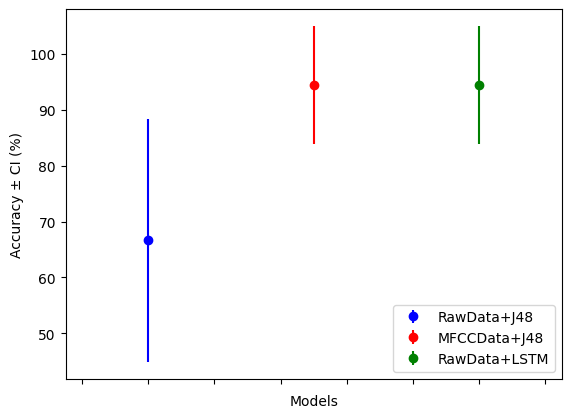

In [ ]:
# PLOT RESULTS
import matplotlib.pyplot as plt
import numpy as np

#ARRAYS/INFO TO PLOT
means = [raw_system_test_acc, feature_system_test_acc, lstm_system_test_acc]
CI = [CI_raw, CI_mfcc, CI_lstm]

#PLOT DATA
fig,ax = plt.subplots(1)
plt.errorbar([0], [raw_system_test_acc], yerr=[CI_raw], fmt='o',label='RawData+J48', color="blue")
plt.errorbar([0.5], [feature_system_test_acc], yerr=[CI_mfcc], fmt='o', label='MFCCData+J48', color="red")
plt.errorbar([1], [lstm_system_test_acc], yerr=[CI_lstm], fmt='o',label='RawData+LSTM', color="green")
#FORMAT OF PLOT
plt.xlim(-0.25, 1.25)
plt.legend(loc='lower right')
plt.ylabel('Accuracy ± CI (%)')
plt.xlabel('Models')
ax.set_xticklabels([])